In [257]:
import tweepy
import csv
import pandas as pd
from textblob import TextBlob
from wordcloud import WordCloud
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import emoji
import contractions
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
access_token = "843397846497873920-eBnFMIvhnPTH8Sh7TOYhOXiyBkgCgZf"
access_token_secret = "dYrgp4CUNQDot0OJgcnpYswS4LK6OKvkvWnhNdXAoxgMa"
api_key = "SZJi2DJP3R9AplyqnTpe3pHy9"
api_key_secret = "Dcv9Fdky1YvZwxs8tn7NqdoXJ3SoeFSVExaZozkW8xpA7MIGMn"

In [3]:
auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit = True)
search_key = "@GenshinImpact"

In [34]:
csvFile = open('genshin_en_2.csv', 'a', encoding='utf-8')
csvWriter = csv.writer(csvFile)
c = []
i = []
u = []
t = []
for tweet in tweepy.Cursor(api.search_tweets, q = search_key,
                           since = '2022-04-05', until = '2022-04-11',
                           lang = 'en').items(2000):
    print (tweet.created_at, tweet.id, tweet.user.name, tweet.text)
    c.append(tweet.created_at)
    i.append(tweet.id)
    u.append(tweet.user.name)
    t.append(tweet.text)
    tweets = [tweet.created_at, tweet.id, tweet.user.name, tweet.text]
    csvWriter.writerow(tweets)

Unexpected parameter: since
Unexpected parameter: since


2022-04-10 23:55:59+00:00 1513304817778708480 WarriorP (ワリオル) RT @GenshinImpact: March Birthday Party

With flowers and dreams in sight,
let's continue our journey together under a warm breeze.

#Gensh…
2022-04-10 23:55:57+00:00 1513304810686140417 Shogan RT @Woeden_: @GenshinImpact He said if you guys offer an Ad Stream with twitch drops and giveaways for the viewers, he would accept and pla…
2022-04-10 23:53:44+00:00 1513304252835315717 MakaWaka RT @GenshinImpact: Traveler, welcome back to Watatsumi Island.
Since early this morning, everyone has been sending me birthday wishes.
But…
2022-04-10 23:53:29+00:00 1513304190633848839 sica RT @__orbitchuu: Dreamcatcher x Genshin (Part 1)

Song: Don’t Light My Fire — #Dreamcatcher

Dreamcatcher’s songs are made for Action RPGs!…
2022-04-10 23:53:29+00:00 1513304190432563205 MakaWaka RT @GenshinImpact: Have you tried Cocoa Paste? It's sweet and rich, and you can make a sweet called chocolate with it.

So this time, I tri…
2022-04-10 23:53:25+

Unexpected parameter: since


2022-04-10 23:41:15+00:00 1513301112568561669 vier @GenshinImpact how abt giving me ayato to make my day better
2022-04-10 23:39:44+00:00 1513300731998187530 Pasteldrums Can we get a mount in Genshin @GenshinImpact ? I wanna ride a horse majestically as Diluc or Zhongli. OR A BLOODHOUND. PLEASE
2022-04-10 23:30:47+00:00 1513298476007841793 ًKirsty 🌱 @Plain0Simple @GenshinImpact Gotta try 😢😢
2022-04-10 23:27:14+00:00 1513297584688934928 Fischl @SipSipStefen Omggg bestiee @GenshinImpact  look at this cool video he posted 😍😍
2022-04-10 23:21:21+00:00 1513296105513005057 hi @GenshinImpact Can you make a new support character similar to xingqiu in which the hydro lasts off-field but the v… https://t.co/C30811DnXD
2022-04-10 23:13:26+00:00 1513294109670137857 Zo @GenshinImpact Gimmie Haran for my ayato please, i’m desperate 😭
2022-04-10 23:11:03+00:00 1513293510698446855 ImpishMoon @GenshinImpact Jail
2022-04-10 23:06:03+00:00 1513292253955084289 Hina✨ RT @DoKomi: 🎉 Experience Genshin Impact

Unexpected parameter: since


2022-04-10 22:38:47+00:00 1513285391054696451 ًmaki pls add more primogems to the event, I need venti pls have merthy I literally spent money on this @GenshinImpact
2022-04-10 22:38:04+00:00 1513285211693400071 Paolo the Frog @unorthodoxfetus @GenshinImpact @Genshin_7 @genshinimpactes @genshinimpactfr @miHoYo @miHoYo_Japan @PlayStationEU… https://t.co/NTYh6vghIS
2022-04-10 22:37:35+00:00 1513285088255127552 bubble @GenshinImpact please fix the teapot im going crazy
2022-04-10 22:36:27+00:00 1513284803449217028 Koriand'r💫🔥 @BeyondFlameR @zera_estafa @japethobera2 @thundersoother @GenshinImpact exactly. Keqing and Razor arent abyss meta… https://t.co/IEsTwd0jVz
2022-04-10 22:34:25+00:00 1513284294558507010 Koriand'r💫🔥 @japethobera2 @thundersoother @GenshinImpact no cuz you shouldnt be using bennet with eula in places that matter an… https://t.co/JeIF8YUFi8
2022-04-10 22:30:26+00:00 1513283291700502536 Kaddi カッディー 🎃 @DoKomi @GenshinImpact How cool ❤️❤️
2022-04-10 22:26:35+00:00 1513282321

Unexpected parameter: since


2022-04-10 21:48:09+00:00 1513272648142311428 ♡⁷ @GenshinImpact fix your stupid domain. and also if my stupid game freezes in a domain &amp; I finish said domain, why a… https://t.co/Ta3G6rwYht
2022-04-10 21:46:09+00:00 1513272144024678402 cherg RT @GenshinImpact: March Birthday Party

With flowers and dreams in sight,
let's continue our journey together under a warm breeze.

#Gensh…
2022-04-10 21:45:56+00:00 1513272089997979648 🌷elena @genshinimpact give me a shenhe for my skyward spine 🤲
2022-04-10 21:40:29+00:00 1513270719966232579 RawDeity The face of a happy WEEB. 
@GenshinImpact 
--------------------------
#Genshinlmpact 
#gacha https://t.co/z8mjqubRXk
2022-04-10 21:39:33+00:00 1513270486662328322 Provisional Head Priestess RT @GenshinUpdate: The cutest greeting i've ever seen 😭😭😭Thank you @GenshinImpact for making this come true, from only Yoimiya's voiceline…
2022-04-10 21:37:37+00:00 1513270000433434636 DoMINgo RT @GenshinImpact: (Oz) Mein Fräulein, a letter has been received.

Unexpected parameter: since


2022-04-10 21:19:05+00:00 1513265334970638338 all time spook =) @GenshinImpact what’s this?🤨🤨 https://t.co/563IlxaSjs
2022-04-10 21:17:36+00:00 1513264961639919630 XYM117 @GenshinImpact Pink
2022-04-10 21:15:56+00:00 1513264539969724419 Angy_Gany17 @GenshinImpact - It has to be at the 2nd highest point of teleportation in iserai (above ´´amakumo summit´´)

- The… https://t.co/kkGpCkS1nD
2022-04-10 21:01:42+00:00 1513260959770415109 ᴠᴀʟᴋʀʏᴊᴀ @GenshinImpact Just got really heavily into the game and I’m so upset that I missed out on this event. Do character… https://t.co/1zLgHEEdDg
2022-04-10 21:01:37+00:00 1513260939663056897 Marke⭐Saito RT @GenshinImpact: All-New Explorable Area: The Chasm

Uncover the mysteries buried deep inside The Chasm!
2022-04-10 21:00:56+00:00 1513260765960040450 Marke⭐Saito RT @GenshinImpact: "I am Shenhe
I roam these mountains
You needn't worry about me

But you... Your temperature seems unusually high
Are you…
2022-04-10 20:59:31+00:00 1513260410576994306 🦈เฮง

Unexpected parameter: since


2022-04-10 20:44:21+00:00 1513256592707395588 🌠 vinzent RT @__orbitchuu: Dreamcatcher x Genshin (Part 2)

Song: Don’t Light My Fire — #Dreamcatcher

@hf_dreamcatcher #GenshinImpact @GenshinImpact…
2022-04-10 20:41:34+00:00 1513255893986643978 mickey its riku they put bugs in him! RT @__orbitchuu: Dreamcatcher x Genshin (Part 1)

Song: Don’t Light My Fire — #Dreamcatcher

Dreamcatcher’s songs are made for Action RPGs!…
2022-04-10 20:37:57+00:00 1513254982795071493 Jonathon @bg2k5 @GenshinImpact Whats up,
Nice project, do you also got a marketing deal from @digitalfever_io team?
Just nee… https://t.co/ZP33dZqIOA
2022-04-10 20:37:19+00:00 1513254823973597190 mmhhmm yummy fan art i luuuvvv RT @GenshinImpact: Dear Travelers,
Thanks to your continued love and support, Genshin Impact's official YouTube channel has now surpassed 5…
2022-04-10 20:36:55+00:00 1513254721041088518 ᾰIZen @GenshinImpact  all u had to to do was gimme vinti 
but u gave me MONAAAAAA !!!!!!!!!!!!!!!
2022-04-10 20:35:05+

Unexpected parameter: since


2022-04-10 20:26:50+00:00 1513252186456993792 R(dita)💜 ||📌 RT @cactus_dina: Andrius Dominator of Wolves 
Humanization
#GenshinImpact #genshin #art @ArtMutuals @GenshinImpact https://t.co/UvUhq2GEom
2022-04-10 20:26:37+00:00 1513252128894164993 Łukasz Skywalker RT @__orbitchuu: Dreamcatcher x Genshin (Part 1)

Song: Don’t Light My Fire — #Dreamcatcher

Dreamcatcher’s songs are made for Action RPGs!…
2022-04-10 20:24:15+00:00 1513251535722999811 🧣just pablo 🇨🇱 @GenshinImpact KFC food on global servers WHEN?
2022-04-10 20:24:09+00:00 1513251507948371978 Keith| 📌 RT @GenshinImpact: March Birthday Party

With flowers and dreams in sight,
let's continue our journey together under a warm breeze.

#Gensh…
2022-04-10 20:23:33+00:00 1513251360497672199 dudu RT @__orbitchuu: Dreamcatcher x Genshin (Part 2)

Song: Don’t Light My Fire — #Dreamcatcher

@hf_dreamcatcher #GenshinImpact @GenshinImpact…
2022-04-10 20:23:10+00:00 1513251260639678466 Vibri @GenshinImpact 
Forgeting is my worst enemy
Anywa

Unexpected parameter: since


2022-04-10 20:19:18+00:00 1513250287519158279 hourly venti 🍃 RT @__orbitchuu: Dreamcatcher x Genshin (Part 1)

Song: Don’t Light My Fire — #Dreamcatcher

Dreamcatcher’s songs are made for Action RPGs!…
2022-04-10 20:19:07+00:00 1513250241721503745 Daily Yanfei RT @__orbitchuu: Dreamcatcher x Genshin (Part 2)

Song: Don’t Light My Fire — #Dreamcatcher

@hf_dreamcatcher #GenshinImpact @GenshinImpact…
2022-04-10 20:17:02+00:00 1513249716980654081 🌸 Minaᴮᴱ ⁷ 🏳️‍🌈 🌸 @DoKomi @GenshinImpact Super excited for this 😍
2022-04-10 20:15:22+00:00 1513249300905607175 ten RT @GenshinImpact: "She's on fire!" —Boatman Wrench Wang, who started screaming, after seeing the stage be set ablaze while watching Xinyan…
2022-04-10 20:12:27+00:00 1513248565631627271 Sam Chow @sithscott @GenshinImpact We know the weapon will be a free 4 star like Aloy's weapon was.
2022-04-10 20:11:31+00:00 1513248329559388162 shadrach @Jojo_Doge_ @GenshinImpact I have a perfect hacking tool
2022-04-10 20:09:32+00:00 15132478299

Unexpected parameter: since


2022-04-10 19:44:42+00:00 1513241580253106180 Steven Haynes @HoYoLAB_Mimo @GenshinImpact 100% Whomever made the call to remove co-op from Theater Mecanicus, fire them.
2022-04-10 19:44:12+00:00 1513241455489388550 Paolo the Frog RT @GenshinImpact: During the event, use the Kamera to help Inazuman illustrator Asagiri find inspirations for her creations. Record variou…
2022-04-10 19:43:48+00:00 1513241357275566090 Kirito Croft RT @DoKomi: 🎉 Experience Genshin Impact at DoKomi! 🎉

Dive into a new world and experience Teyvat live at #DoKomi2022:

We are very happy t…
2022-04-10 19:42:19+00:00 1513240981210079242 gender island If we just bringing anything back you should bring back that event with Childe and Xinyan ! @GenshinImpact
2022-04-10 19:39:27+00:00 1513240259554856970 Mamehoshi @DOKOMI2022 RT @DoKomi: 🎉 Experience Genshin Impact at DoKomi! 🎉

Dive into a new world and experience Teyvat live at #DoKomi2022:

We are very happy t…
2022-04-10 19:34:51+00:00 1513239102552002563 shadrach

Unexpected parameter: since


2022-04-10 18:56:50+00:00 1513229538125254657 Subhankar Ghosh @itss_miaxx @GenshinImpact Atleast more base stats
2022-04-10 18:52:12+00:00 1513228368422051845 TheLostOne RT @DoKomi: 🎉 Experience Genshin Impact at DoKomi! 🎉

Dive into a new world and experience Teyvat live at #DoKomi2022:

We are very happy t…
2022-04-10 18:48:46+00:00 1513227504991059968 ُ RT @__orbitchuu: Dreamcatcher x Genshin (Part 1)

Song: Don’t Light My Fire — #Dreamcatcher

Dreamcatcher’s songs are made for Action RPGs!…
2022-04-10 18:47:44+00:00 1513227246177116168 ⚪️AegisWings🔴 RT @__orbitchuu: Dreamcatcher x Genshin (Part 1)

Song: Don’t Light My Fire — #Dreamcatcher

Dreamcatcher’s songs are made for Action RPGs!…
2022-04-10 18:47:33+00:00 1513227197959798784 xenqs RT @__orbitchuu: Dreamcatcher x Genshin (Part 1)

Song: Don’t Light My Fire — #Dreamcatcher

Dreamcatcher’s songs are made for Action RPGs!…
2022-04-10 18:45:55+00:00 1513226789572825094 da.alphax For the love of god @GenshinImpact let me build in

Unexpected parameter: since


2022-04-10 18:24:59+00:00 1513221522554437633 приколог 💙💛 @juanrios417 @GenshinImpact well because in lore that's how it is haha
2022-04-10 18:22:47+00:00 1513220968675934208 7PPR aka พีมมี่เทพซ่า RT @GenshinImpact: ❄️ or 🔥

Who's Your Pick?
2022-04-10 18:20:07+00:00 1513220297985470468 Maz Haque Update: The flipping count stays at 1 for rusty and 2 for golden koi. This is nuts. Do something about it @GenshinImpact
2022-04-10 18:19:24+00:00 1513220113910333441 7PPR aka พีมมี่เทพซ่า RT @GenshinImpact: Which one do you want to try? 😄
A. Dango
B. Milk Tea
C. Popsicle
D. Apple
E._____
2022-04-10 18:19:00+00:00 1513220016908341250 Beatrice 🌻 @GenshinImpact I LOVE HIM SO MUCH HE IS MY SON https://t.co/anUrXs5UpG
2022-04-10 18:16:21+00:00 1513219348223217671 Baaren 64 @GenshinImpact I don't know I'm not a pedophile
2022-04-10 18:14:24+00:00 1513218855664975876 Daily Yanfei RT @__orbitchuu: Dreamcatcher x Genshin (Part 1)

Song: Don’t Light My Fire — #Dreamcatcher

Dreamcatcher’s songs are mad

Unexpected parameter: since


2022-04-10 17:48:20+00:00 1513212299183820800 Yoshirou RT @thomapics: @GenshinImpact who the fuck https://t.co/KohlDNG42I
2022-04-10 17:48:17+00:00 1513212286647021568 Yoshirou RT @rayji28_: @GenshinImpact ya talking about Apple commercial? 💀 https://t.co/W0GRH8XHFg
2022-04-10 17:47:52+00:00 1513212181709574152 Mora_Mora @GenshinImpact 
Ayato is worse then Childe in ever imaginable way 
#Genshinlmpact #Ayato #Childe #KamisatoAyato #GenshinImpactth #Genshin
2022-04-10 17:44:37+00:00 1513211362423754752 Yoshirou RT @WaLkerDaiKachi: @GenshinImpact Happy Birthday Noelle https://t.co/XvyCE3Ms90
2022-04-10 17:44:33+00:00 1513211344337895425 Yoshirou RT @Enhrity_IC: @GenshinImpact MY MAINNNN &lt;333333 HAPPY BIRTHDAY🎉🎉🎉 https://t.co/qEmVBJomu6
2022-04-10 17:43:12+00:00 1513211004758687750 Yoshirou RT @Faridchaile1: @GenshinImpact Happy Birthday Noelle! https://t.co/DnMCLydvSr
2022-04-10 17:43:06+00:00 1513210981648048139 Yoshirou RT @cocogoatv: @godisbeidou @Subtlety_Sama @GenshinImpact Aethe

Unexpected parameter: since


2022-04-10 17:32:31+00:00 1513208317383950341 👾 @tuIipsarepretty @GenshinImpact THEY ALL LOOK SO CUTE I LOVE YOUR STYLE SM THIS IS SO PRETTY
2022-04-10 17:32:20+00:00 1513208269187293188 👾 @tuIipsarepretty @GenshinImpact OH MY GOD IM GONNA SIEEEE
2022-04-10 17:28:50+00:00 1513207391604682765 Helin🧸 RT @GenshinImpact: I'd like to suggest that you treat her as an ordinary person, but if you do, it's easy to lose control over negotiations…
2022-04-10 17:21:47+00:00 1513205614754811906 luwu 🔞🍊 HIIRO JOJO POSE RT @kitsunamin: 【 Genshin Impact Cosplay 】

Gorou by @kitsunamin 
Arataki Itto by @ZanzaSano 
From @genshinimpact / @BRGenshinImpact 
Ph by…
2022-04-10 17:21:12+00:00 1513205470307434496 Mia _not cute aim for justice 👹⚖️🥷♓🧠 RT @GenshinImpact: Friend to Animals😊
2022-04-10 17:20:09+00:00 1513205206913363975 ⟭⟬⁷Boopsie😊⁷ᴺᵒ¹💜⟬⟭⁷💚🤝🧡 | PROUD VENTI HAVER RT @DvaGNoelleAyaka: @GenshinImpact Best lector ever, the man hates his job and calls everyone in the abyss a simp: https://t.co/vhaM90v42

Unexpected parameter: since


2022-04-10 16:58:37+00:00 1513199784303104001 🌸ᴋᴀᴛʜ⁷⁺⁹⁺¹²⟭⟬🍭🇵🇭 🇹🇼💖ʙᴛs❤️ᴛᴡɪᴄᴇ❤️ɪᴢᴏɴᴇ ˣ‿ˣ💖 I Think I Got Best Shots of Kamera Event For Yae Miko and Keqing
@GenshinImpact

#GenshinImapct 
#YaeMiko 
#Keqing https://t.co/0AYFFR9DFn
2022-04-10 16:57:39+00:00 1513199542195441668 Opal / Tommy 🍂 @thomawoof @GenshinImpact I’ll disintegrate if it doesn’t happen
2022-04-10 16:56:54+00:00 1513199352843542539 Karma @GenshinImpact Lord have mercy
2022-04-10 16:56:39+00:00 1513199290600075267 hannah @tuIipsarepretty @GenshinImpact this belongs in the louvre
2022-04-10 16:54:02+00:00 1513198633654517762 DivineDynasty RT @GenshinImpact: Teyvat Times Returns With a Bang!

Hello Travelers~ After a long time, Teyvat Times is finally back again! 

If you can…
2022-04-10 16:53:47+00:00 1513198568491782147 Hatarubi Cosplay @visagefox @kuroki_amaya @RUGenshinimpact @GenshinImpact Sooo cute and beautiful
2022-04-10 16:52:01+00:00 1513198124906561543 Iskandar @GenshinImpact Wtf Mihoyo, do you hate me? Do you ha

Unexpected parameter: since


2022-04-10 16:39:12+00:00 1513194901013504001 happytimeforu~(◡﹏◕✿) buzy with school RT @GenshinUpdate: The cutest greeting i've ever seen 😭😭😭Thank you @GenshinImpact for making this come true, from only Yoimiya's voiceline…
2022-04-10 16:33:28+00:00 1513193457598144516 NoName @yelanarchive @GenshinImpact Patience is the key for every Yelan wanter to become Yelan haver. Though not like I do… https://t.co/n3iJtDazXH
2022-04-10 16:33:04+00:00 1513193356905566210 lumi RT @DoKomi: In addition to that, we have planned several @GenshinImpact activities for you, which we will announce in the upcoming days!

W…
2022-04-10 16:32:44+00:00 1513193272289730561 Thunder | (150/180) for Kazuha💀 @GenshinImpact They're really close indeed https://t.co/B06PuRThli
2022-04-10 16:32:43+00:00 1513193265994031114 lumi RT @DoKomi: 🎉 Experience Genshin Impact at DoKomi! 🎉

Dive into a new world and experience Teyvat live at #DoKomi2022:

We are very happy t…
2022-04-10 16:29:06+00:00 1513192358925504518 romeo @

Unexpected parameter: since


2022-04-10 16:23:08+00:00 1513190855317852163 sokka🧋 @tuIipsarepretty @GenshinImpact I LOVE THIS
2022-04-10 16:22:59+00:00 1513190818160553986 sokka🧋 @tuIipsarepretty @GenshinImpact THIS IS INSANE
2022-04-10 16:22:50+00:00 1513190782722842630 sokka🧋 @tuIipsarepretty @GenshinImpact can u stop being talented
2022-04-10 16:21:47+00:00 1513190517768658945 🌸Norah@working on visual novels ✏️💪 @DoKomi @GenshinImpact Uwaaah so cool!! This makes me so happy! 😍😍
2022-04-10 16:21:42+00:00 1513190494100066305 ling MF STOP MAKING ME STAY IN THE LOADING SCREEN FOR AN HOUR AND CLIPPING INTO THE GROUND ONLY FOR MY MONA TO DIE 🖕🖕🖕@GenshinImpact
2022-04-10 16:20:17+00:00 1513190140935557120 HELE @hinaszk @GenshinImpact  please be real
2022-04-10 16:18:54+00:00 1513189792246341637 Emma ❦ A MILLION PRIMOS FOR THIS @GenshinImpact https://t.co/DrPaYh72Ki
2022-04-10 16:17:32+00:00 1513189448233721872 LGXGhostax @AngelSl1ce @GenshinImpact Alix got injured..ankle friction burn from the slide 🤣
2022-04-10 16:16

Unexpected parameter: since


2022-04-10 16:05:44+00:00 1513186478268030982 lina | ayato came home RT @__orbitchuu: Dreamcatcher x Genshin (Part 2)

Song: Don’t Light My Fire — #Dreamcatcher

@hf_dreamcatcher #GenshinImpact @GenshinImpact…
2022-04-10 16:05:14+00:00 1513186349494505483 lina | ayato came home RT @__orbitchuu: Dreamcatcher x Genshin (Part 1)

Song: Don’t Light My Fire — #Dreamcatcher

Dreamcatcher’s songs are made for Action RPGs!…
2022-04-10 16:00:31+00:00 1513185162808463370 Хиёми RT @cactus_dina: Andrius Dominator of Wolves 
Humanization
#GenshinImpact #genshin #art @ArtMutuals @GenshinImpact https://t.co/UvUhq2GEom
2022-04-10 16:00:19+00:00 1513185112703262725 КАКТУС RT @cactus_dina: Andrius Dominator of Wolves 
Humanization
#GenshinImpact #genshin #art @ArtMutuals @GenshinImpact https://t.co/UvUhq2GEom
2022-04-10 16:00:13+00:00 1513185089299316736 77 RT @GenshinImpact: Hello, Travelers~
The Version 2.3 Commemorative Lottery Event has begun!
 
Don't miss the chance to get Primogems!

View…
2022-04

Unexpected parameter: since


2022-04-10 15:32:02+00:00 1513177997523636225 Escuela de Gamer @Asmongold Sponsored this guy now @GenshinImpact
2022-04-10 15:31:36+00:00 1513177888991940610 Kazuma RT @GenshinImpact: Teyvat Times Returns With a Bang!

Hello Travelers~ After a long time, Teyvat Times is finally back again! 

If you can…
2022-04-10 15:30:39+00:00 1513177648226312202 💜Ina💜 RT @DoKomi: 🎉 Experience Genshin Impact at DoKomi! 🎉

Dive into a new world and experience Teyvat live at #DoKomi2022:

We are very happy t…
2022-04-10 15:28:31+00:00 1513177109669167110 𓎡𓍯𓅓𓍯𓂋𓇋 𓆓𓍢𓈖 RT @GenshinImpact: @sunarriinn Here, have a miao instead. https://t.co/26UjeZlSP1
2022-04-10 15:25:48+00:00 1513176429101559815 Ophelia Ember RT @GenshinImpact: When the maple leaves turn red, look to the distant mountains and you will discover the vast scarlet blanket that covers…
2022-04-10 15:25:27+00:00 1513176339494449153 Ophelia Ember RT @GenshinImpact: Are these Golden Shrimp Balls... for me?

Mmm... the crust is gold and crispy, and 

Unexpected parameter: since


2022-04-10 15:22:08+00:00 1513175503175397384 Ophelia Ember RT @GenshinImpact: "Spiraling Songs of Ice and Snow"

"The weather is perfect, we've got everything with us, let's go together!"
"Keep up w…
2022-04-10 15:21:51+00:00 1513175435756064785 Ophelia Ember RT @GenshinImpact: I have long wanted to take you to watch the sunset at sea. It just so happens that the sky is beautiful today. 

When ev…
2022-04-10 15:20:41+00:00 1513175139906891778 ☆ Rudч ☆ 🌱 RT @lovsickgirls: @__orbitchuu @hf_dreamcatcher @GenshinImpact @HoYoLAB_Mimo OMG THIS IS DOPE
2022-04-10 15:20:40+00:00 1513175134110158853 Ophelia Ember RT @GenshinImpact: "Such fortunate weather... Care for a walk?"

The Character Event Wish-2 "Drifting Luminescence" will be available after…
2022-04-10 15:20:36+00:00 1513175120893857800 Ophelia Ember RT @GenshinImpact: Hello, Travelers!

I heard there's a beautiful lady in Inazuma that is not only elegant, but will also feed the finches…
2022-04-10 15:20:30+00:00 1513175092431409155 

Unexpected parameter: since


2022-04-10 15:07:32+00:00 1513171832375066631 LGXGhostax We have atleast 2 kids partys a week

Tried @GenshinImpact this weekend for the first time. Actually blown away wit… https://t.co/Rst12554oK
2022-04-10 15:06:21+00:00 1513171532763308032 ~|~i like frogs🐸~|~ @GenshinImpact I can't login because it keeps saying "network" error, but my internet is fine? is anyone else havin… https://t.co/NCj8lp7704
2022-04-10 15:05:18+00:00 1513171268870287363 yan✨ Ayato's Husband 💙 HUH???? 
@GenshinImpact explain yourselves immediately https://t.co/90p4d9mKcx
2022-04-10 15:01:37+00:00 1513170341522292737 Binisprout 🌱 @ slow replies RT @DoKomi: 🎉 Experience Genshin Impact at DoKomi! 🎉

Dive into a new world and experience Teyvat live at #DoKomi2022:

We are very happy t…
2022-04-10 15:00:06+00:00 1513169959114973185 LotusMoonBunny 《Vtuber》 RT @__orbitchuu: Dreamcatcher x Genshin (Part 1)

Song: Don’t Light My Fire — #Dreamcatcher

Dreamcatcher’s songs are made for Action RPGs!…
2022-04-10 14:54:54+0

Unexpected parameter: since


2022-04-10 14:38:51+00:00 1513164611910000643 「Yamada」🧋 🇨🇿 on vacation Excuse me @GenshinImpact ?? You mean... you want to raise the prices?

We're already living in hell here and you wa… https://t.co/1VsX3rNuku
2022-04-10 14:36:47+00:00 1513164091573080070 🦊 F◊× ｴℕᗑℜｴ RT @DoKomi: 🎉 Experience Genshin Impact at DoKomi! 🎉

Dive into a new world and experience Teyvat live at #DoKomi2022:

We are very happy t…
2022-04-10 14:34:26+00:00 1513163500037853185 mims⁷ @GenshinImpact let's make a deal, i get my guaranteed yoimiya back, you get your ayato back https://t.co/cpI0OiHG0V
2022-04-10 14:33:53+00:00 1513163364532310020 Rev @GenshinImpact Im gonna keep sending this image until you finally decide to give us controller support https://t.co/SdIp4GPSQO
2022-04-10 14:32:08+00:00 1513162923232923653 laura RT @__orbitchuu: Dreamcatcher x Genshin (Part 2)

Song: Don’t Light My Fire — #Dreamcatcher

@hf_dreamcatcher #GenshinImpact @GenshinImpact…
2022-04-10 14:24:05+00:00 1513160896297590787 erry 

Unexpected parameter: since


2022-04-10 14:13:17+00:00 1513158177545723907 Choco⁷ RT @DoKomi: 🎉 Experience Genshin Impact at DoKomi! 🎉

Dive into a new world and experience Teyvat live at #DoKomi2022:

We are very happy t…
2022-04-10 14:12:29+00:00 1513157976055443459 kane RT @GenshinUpdate: The cutest greeting i've ever seen 😭😭😭Thank you @GenshinImpact for making this come true, from only Yoimiya's voiceline…
2022-04-10 14:12:14+00:00 1513157912692207617 Lilia RT @__orbitchuu: Dreamcatcher x Genshin (Part 2)

Song: Don’t Light My Fire — #Dreamcatcher

@hf_dreamcatcher #GenshinImpact @GenshinImpact…
2022-04-10 14:11:48+00:00 1513157806643458048 ScorcherSC RT @Scrubscruber: @GenshinImpact A fictional character https://t.co/hddiimswvk
2022-04-10 14:09:52+00:00 1513157319076499459 Yaya-Chan@Dokomi2022 RT @DoKomi: 🎉 Experience Genshin Impact at DoKomi! 🎉

Dive into a new world and experience Teyvat live at #DoKomi2022:

We are very happy t…
2022-04-10 14:06:27+00:00 1513156458086555651 Eder ❄️ RT @__orbitchuu: Dreamca

Unexpected parameter: since


2022-04-10 13:55:57+00:00 1513153814559621127 Masanori Takamoto I can't stream because of PLDC so I tried to check fortune and got Great Fortune and pulled for #Ayato. Lol another… https://t.co/SUdmIhFCvp
2022-04-10 13:54:59+00:00 1513153573504557058 SHOCKWAVE X (Rhyth) Official @GenshinImpact Can Klee’s wish event come back version 2.7 please i want Klee to come back please🥺🥺🥺🥺🥺🥺🥺🥺🥺🥺
2022-04-10 13:52:47+00:00 1513153019684302849 Owl Parliament Ambassador 🇺🇦 RT @DoKomi: 🎉 Experience Genshin Impact at DoKomi! 🎉

Dive into a new world and experience Teyvat live at #DoKomi2022:

We are very happy t…
2022-04-10 13:50:15+00:00 1513152380090605569 Romo @GenshinImpact Why do you keep making the Theater Mechanicus to be less and less fun to play... ffs... #dontfixwhatisnotbroken
2022-04-10 13:50:00+00:00 1513152317989986306 すかゐ(い) RT @Taryn_Cosplay: I wanna be the very best 🎶
Like no one ever was 🎶
To catch them is my real test 🎶
To train them is my cause  🎶

Just Itt…
2022-04-10 13:49:57+00:0

Unexpected parameter: since


2022-04-10 13:41:01+00:00 1513150059898359808 😭 @GenshinImpact Is hot
2022-04-10 13:40:53+00:00 1513150023273381889 adeline ♡'s lyn DAMNNNNNNNNNN @GenshinImpact ARE WE ABOUT TO KISS? https://t.co/dyxRC2kLID
2022-04-10 13:36:43+00:00 1513148976404463626 Kelias291 RT @GenshinUpdate: The cutest greeting i've ever seen 😭😭😭Thank you @GenshinImpact for making this come true, from only Yoimiya's voiceline…
2022-04-10 13:36:15+00:00 1513148860394315777 🌸 ナディッチ 🌸 RT @DoKomi: 🎉 Experience Genshin Impact at DoKomi! 🎉

Dive into a new world and experience Teyvat live at #DoKomi2022:

We are very happy t…
2022-04-10 13:34:38+00:00 1513148453127397376 Taril Nephtu 🦑 RT @DoKomi: 🎉 Experience Genshin Impact at DoKomi! 🎉

Dive into a new world and experience Teyvat live at #DoKomi2022:

We are very happy t…
2022-04-10 13:34:26+00:00 1513148403202633733 🍁-Desaster Gay (Ay)Atsu-🐱 @Depresso RT @DoKomi: 🎉 Experience Genshin Impact at DoKomi! 🎉

Dive into a new world and experience Teyvat live at #DoKomi202

Unexpected parameter: since


2022-04-10 13:31:28+00:00 1513147656155058176 🐧 atsu RT @DoKomi: 🎉 Experience Genshin Impact at DoKomi! 🎉

Dive into a new world and experience Teyvat live at #DoKomi2022:

We are very happy t…
2022-04-10 13:30:35+00:00 1513147433538232330 Sammy RT @DoKomi: 🎉 Experience Genshin Impact at DoKomi! 🎉

Dive into a new world and experience Teyvat live at #DoKomi2022:

We are very happy t…
2022-04-10 13:30:05+00:00 1513147306543312896 Eder ❄️ RT @__orbitchuu: Dreamcatcher x Genshin (Part 1)

Song: Don’t Light My Fire — #Dreamcatcher

Dreamcatcher’s songs are made for Action RPGs!…
2022-04-10 13:29:59+00:00 1513147280538456074 Minami ✿ RT @DoKomi: 🎉 Experience Genshin Impact at DoKomi! 🎉

Dive into a new world and experience Teyvat live at #DoKomi2022:

We are very happy t…
2022-04-10 13:28:48+00:00 1513146984881963011 Selin★彡poppin pills with sanzu♡ RT @DoKomi: 🎉 Experience Genshin Impact at DoKomi! 🎉

Dive into a new world and experience Teyvat live at #DoKomi2022:

We are very happy t…
202

Unexpected parameter: since


2022-04-10 13:07:25+00:00 1513141602948378630 NutZaZA RT @GenshinImpact: "The game of politics is fraught with peril. My Lord does not take any joy in these 'battles.' For him, it's just... a m…
2022-04-10 13:05:17+00:00 1513141067532496896 Jonard Nillo @LaDyyZerO @GenshinImpact omg congrats you deserve it 🤍
2022-04-10 13:04:50+00:00 1513140951476314116 ruth RT @GenshinImpact: Kuki Shinobu ‧ Mender of Tribulations

Deputy Leader of the Arataki Gang

#GenshinImpact https://t.co/2TtwpiDo8T
2022-04-10 13:04:45+00:00 1513140931922382855 ruth RT @GenshinImpact: Yelan ‧ Valley Orchid
A mysterious person who claims to work for the Ministry of Civil Affairs

Yelan's identity has alw…
2022-04-10 13:01:24+00:00 1513140089462874112 Piko @svshifae @GenshinImpact YOU GET ME!!
2022-04-10 12:50:14+00:00 1513137278062772224 chiriechupa @GenshinImpact My husband 😔💍
2022-04-10 12:45:55+00:00 1513136192048574469 Lumine&Ayato admirer(*＾ᵕ＾*) RT @GenshinUpdate: The cutest greeting i've ever seen 😭😭😭Thank yo

Unexpected parameter: since


2022-04-10 12:26:27+00:00 1513131291712970752 Gwonie RT @GenshinUpdate: The cutest greeting i've ever seen 😭😭😭Thank you @GenshinImpact for making this come true, from only Yoimiya's voiceline…
2022-04-10 12:26:15+00:00 1513131242019246080 Hourly Klee 🍀 RT @__orbitchuu: Dreamcatcher x Genshin (Part 1)

Song: Don’t Light My Fire — #Dreamcatcher

Dreamcatcher’s songs are made for Action RPGs!…
2022-04-10 12:19:39+00:00 1513129580223102983 simone ˃̵ᴗ˂̵ RT @GenshinImpact: Kuki Shinobu ‧ Mender of Tribulations

Deputy Leader of the Arataki Gang

#GenshinImpact https://t.co/2TtwpiDo8T
2022-04-10 12:19:31+00:00 1513129548098899971 simone ˃̵ᴗ˂̵ RT @GenshinImpact: I'd like to suggest that you treat her as an ordinary person, but if you do, it's easy to lose control over negotiations…
2022-04-10 12:11:02+00:00 1513127414825914370 💚💜👁️ barrels 👁️💜💚 @ comms and stuff!!! RT @Haliya_vt: 🔴LIVE🔴 https://t.co/f6RaDlyJxR 

Now attending Inazuma Con~

🖥️Now Playing: @GenshinImpact 
 
#HaliyaLive #Vtuber #

Unexpected parameter: since


2022-04-10 11:58:35+00:00 1513124277939318788 🌊calistoomf⛓ @svshifae @GenshinImpact what vision should she have
2022-04-10 11:57:21+00:00 1513123969737830405 eyeyu⁷🧈 @GenshinImpact SO GENSHIN ON NINTENDO SWITCH WHEN https://t.co/Yy4eu5AwyZ
2022-04-10 11:54:29+00:00 1513123248313188360 jeanne | yelan waiting room RT @larochefort11: Yelan ◆ Valley Orchid @GenshinImpact 

◆ A mysterious person who claims to work for the Ministry of Civil Affairs

Pre-0…
2022-04-10 11:53:09+00:00 1513122912961761287 fae i needdddddd klee's mother alice to be playable this is URGENT @GenshinImpact
2022-04-10 11:43:42+00:00 1513120535127130113 🔞🐳🧋ChiYato Brainrot🐳🧋🔞 RT @dekoponi: "Hahaha~!!" Targalia fanart. Ayato is awesome but my heart belongs to Childe :'3 #Childe #GenshinImpact #genshinimpactfanart…
2022-04-10 11:38:36+00:00 1513119252814999554 лана 西谷 | #нетвойне RT @bonbonyart: when he's finally here 💚 (ㅅ´ ˘ `)
#venti #ventigenshin #genshinimpact #genshin #xingqiu #albedo #zhenyu @GenshinImpact #ina…
2

Unexpected parameter: since


2022-04-10 10:57:20+00:00 1513108864119443457 MAISON SOTY 🌱 | #Apocalypse:SaveUs RT @__orbitchuu: Dreamcatcher x Genshin (Part 1)

Song: Don’t Light My Fire — #Dreamcatcher

Dreamcatcher’s songs are made for Action RPGs!…
2022-04-10 10:57:16+00:00 1513108849292505091 lucel @GenshinImpact IT'S MY BIRTHDAY ON APRIL 19 SO I'LL BE THE HAPPIEST IF I HAVE VENTI BEFORE HIS BANNER ENDS
2022-04-10 10:56:28+00:00 1513108648918077441 lucel @GenshinImpact I'LL CRY FOR YEARS UNTIL HIS RERUN AGAIN SO GIVE VENTI TO ME 🙃
2022-04-10 10:56:11+00:00 1513108576524726275 and @resz_ @GenshinImpact as they should
2022-04-10 10:55:39+00:00 1513108441535254529 Merimero |🐳✨|👻🍦|🌸🌊| Kinda Hiatus RT @GenshinImpact: It's so rare to receive a bouquet for my birthday. You carefully picked it out, right? Thanks a bunch!

While it's still…
2022-04-10 10:55:27+00:00 1513108392419549184 lucel @GenshinImpact HI PLEASE I BEG YOU GIVE VENTI TO ME 🙃
2022-04-10 10:50:26+00:00 1513107128738848771 Kozy i sure do hope teapot mai

Unexpected parameter: since


2022-04-10 10:20:19+00:00 1513099549761732610 saya | ♡ let us convert primos into genesis please i wanna get keqing skin so bad  @GenshinImpact
2022-04-10 10:17:13+00:00 1513098768379351043 Gina S, mostly u will see retweeted post here RT @Nagarnia_art: @GenshinImpact YES I CAN SELL MORE CHUNKIES YES THANK YOU MIHOYO https://t.co/CU9vJNvFng
2022-04-10 10:15:21+00:00 1513098299611676672 leo🥀 i want a refund @GenshinImpact
2022-04-10 10:13:32+00:00 1513097843820875778 hyera 🩰 @PRlNCEPHS @GenshinImpact we’re not besties they didn’t give me haran 🙄🙄🙄
2022-04-10 10:10:33+00:00 1513097092117708803 Kimmo Qi RT @GenshinImpact: New Story Unlocked - Archon Quest Chapter II: Act IV "Requiem of the Echoing Depths"

Divine calamity descended upon the…
2022-04-10 10:10:27+00:00 1513097065639079936 Kimmo Qi RT @GenshinImpact: Yelan ‧ Valley Orchid
A mysterious person who claims to work for the Ministry of Civil Affairs

Yelan's identity has alw…
2022-04-10 10:10:24+00:00 1513097055962812418 Kimmo Qi 

Unexpected parameter: since


2022-04-10 10:02:47+00:00 1513095140021137409 roxy 🐻 RT @yelanarchive: @GenshinImpact  gimme yelan rn
2022-04-10 09:59:04+00:00 1513094202648801286 ✨ゆずい RT @GenshinImpact: Which one do you want to try? 😄
A. Dango
B. Milk Tea
C. Popsicle
D. Apple
E._____
2022-04-10 09:58:07+00:00 1513093963032547336 wal 🦋 RT @__orbitchuu: Dreamcatcher x Genshin (Part 1)

Song: Don’t Light My Fire — #Dreamcatcher

Dreamcatcher’s songs are made for Action RPGs!…
2022-04-10 09:56:27+00:00 1513093543652384768 kozuu @CLeiya @GenshinImpact @Genshin_7 @Ayato_Mains @__jingzhe @AZUREVEILED woahhh this looks stunning
2022-04-10 09:48:55+00:00 1513091648036634626 qia (kinda ia) | #LetLeniKikoLead i would really LIKE to see ayato and albedo to interact PLEASE @GenshinImpact
2022-04-10 09:46:01+00:00 1513090917812506634 pew pew RT @GenshinImpact: Brandish the spear to vanquish evil and set off fireworks to pray for peace.

#GenshinImpact https://t.co/ua4yvzupIM
2022-04-10 09:44:28+00:00 1513090528518316038 El RT @__

Unexpected parameter: since


2022-04-10 09:21:52+00:00 1513084841549451267 Jennifer @kupocoffee @GenshinImpact PLEASE THIS IS SO CUTE I AM IN LOVE
2022-04-10 09:19:17+00:00 1513084191944105984 star 🪐✨ @GenshinImpact can u make a kaeya hangout event pleas 
or diluc 
or venti
2022-04-10 09:19:16+00:00 1513084185145135104 Ravi @GenshinImpact Waiting for the day Lasignora is playable .
2022-04-10 09:18:35+00:00 1513084014801866753 Eeriah @somaruyoh @GenshinImpact OMG YESSSSS
2022-04-10 09:17:42+00:00 1513083793715843073 Pao RT @GenshinUpdate: The cutest greeting i've ever seen 😭😭😭Thank you @GenshinImpact for making this come true, from only Yoimiya's voiceline…
2022-04-10 09:17:03+00:00 1513083628904886272 . RT @__orbitchuu: Dreamcatcher x Genshin (Part 1)

Song: Don’t Light My Fire — #Dreamcatcher

Dreamcatcher’s songs are made for Action RPGs!…
2022-04-10 09:15:23+00:00 1513083207616385024 WαnAshrαf✌ RT @GenshinUpdate: The cutest greeting i've ever seen 😭😭😭Thank you @GenshinImpact for making this come true, from onl

Unexpected parameter: since


2022-04-10 09:01:02+00:00 1513079597348368388 Yasu RT @artforcharacte1: Hope you guys like my art of venti &lt;3 Even if noone sees this LMAO #GenshinImpact #ventifanart #venti @GenshinImpact #…
2022-04-10 08:55:30+00:00 1513078205938569217 catsuneko 😺 RT @GenshinImpact: March Birthday Party

With flowers and dreams in sight,
let's continue our journey together under a warm breeze.

#Gensh…
2022-04-10 08:55:28+00:00 1513078197553967104 Lunas Blog RT @__orbitchuu: Dreamcatcher x Genshin (Part 1)

Song: Don’t Light My Fire — #Dreamcatcher

Dreamcatcher’s songs are made for Action RPGs!…
2022-04-10 08:55:01+00:00 1513078082357411845 Jana @killuaightning @Drea4Pres @GenshinImpact and how 🥲 I always plant random things I don’t quite get it haha
2022-04-10 08:53:46+00:00 1513077768493633544 fifi🦋 @curryliveevil @GenshinImpact yup still
2022-04-10 08:53:15+00:00 1513077640999096322 — H1k4ru.c0m || IA for a few weeks RT @fenia_ky: That’s the cutest thing I’ve ever made🤧 @GenshinImpact #Genshin

Unexpected parameter: since


2022-04-10 08:28:45+00:00 1513071475229859840 Morgan RT @GenshinImpact: "Hey, Traveler and Paimon! You have arrived! Come on up, the banquet has just started!"

#GenshinImpact https://t.co/WbV…
2022-04-10 08:28:03+00:00 1513071298552889350 🌱City Adele in la Maison🌱 RT @__orbitchuu: Dreamcatcher x Genshin (Part 2)

Song: Don’t Light My Fire — #Dreamcatcher

@hf_dreamcatcher #GenshinImpact @GenshinImpact…
2022-04-10 08:26:53+00:00 1513071002686685184 Beatrice 🌻 Happy 11 days with Ayato 🌊 @GenshinImpact #Ayato https://t.co/Qa0gOaMpaB
2022-04-10 08:20:16+00:00 1513069339196461061 Captain Camille ✈ ENVtuber RT @VeenaElf: Tweeting at @GenshinImpact every day until they add a dialogue skip button, day 2
2022-04-10 08:17:50+00:00 1513068727029604353 venti's haver but in the second acc RT @GenshinUpdate: The cutest greeting i've ever seen 😭😭😭Thank you @GenshinImpact for making this come true, from only Yoimiya's voiceline…
2022-04-10 08:12:35+00:00 1513067406855344131 emil RT @yelanarchive: @Ge

Unexpected parameter: since


2022-04-10 08:02:56+00:00 1513064976243904514 donna is now a DILUC haver 💔💔💔 @GenshinImpact //omg hey babe ooppss https://t.co/XQnmcAD6E8
2022-04-10 08:02:54+00:00 1513064970174402568 Yuuki RT @GenshinImpact: Friend to Animals😊
2022-04-10 08:02:15+00:00 1513064805078384642 KuriKari @GenshinImpact So many blights on this wonderful game...fix your systems. Artifacts need a total rework, there is w… https://t.co/52NQaW761z
2022-04-10 08:01:26+00:00 1513064598781702145 ᴢᴇ🐾 RT @__orbitchuu: Dreamcatcher x Genshin (Part 1)

Song: Don’t Light My Fire — #Dreamcatcher

Dreamcatcher’s songs are made for Action RPGs!…
2022-04-10 08:01:14+00:00 1513064547841880064 Hoiyuko🌹 @GenshinImpact pls give venti to me i beg you! Hes my most loved character and then i lost- im speechless when j lo… https://t.co/lVJX6LsUXj
2022-04-10 08:00:46+00:00 1513064430770270209 Kamichi Kaya 🦄 VTUBER ~ Cornmissions OPEN RT @VeenaElf: Tweeting at @GenshinImpact every day until they add a dialogue skip button, day 2
2022-

Unexpected parameter: since


2022-04-10 07:39:50+00:00 1513059164444332033 RoliePolieOlie @albdoist I hate his model, i mean @GenshinImpact YOU GUYS HAVE BUFF MODELS!! USE IT!!!!
2022-04-10 07:38:46+00:00 1513058893613907968 Beatrice 🌻 @GenshinImpact best English voice actor for me no contest https://t.co/unYBgTN10D
2022-04-10 07:38:18+00:00 1513058777410699270 wade/yor @GenshinImpact 1k primos bc that teapot maintenance is taking decades
2022-04-10 07:35:23+00:00 1513058045252837380 Nobody @MadMajima @GenshinImpact Sorry for my bad grammar
2022-04-10 07:34:50+00:00 1513057905188253699 Nobody @MadMajima @GenshinImpact Idk they might get in trouble besides hoyoverse dosemt own Aloy horizon do soo Idk maybe
2022-04-10 07:33:30+00:00 1513057567924264960 ⚡️/Lu-mine/Ganqing/⚡️ @GenshinImpact needs artifact system to be changed/optimized, its not “farm every day” or “luck” it is just painful… https://t.co/bKIpHccFgy
2022-04-10 07:31:37+00:00 1513057096220119043 Little 오쿠미 🌍 RT @__orbitchuu: Dreamcatcher x Genshin (Part 

Unexpected parameter: since


2022-04-10 07:24:27+00:00 1513055293562834949 ᴮᴱ Ariia ⁷ @rukieito2800 Please make it real !! @GenshinImpact @HoYoLAB_Mimo
2022-04-10 07:14:54+00:00 1513052890562285570 Fix Day 35 of asking miHoYo to fix Lisa and Amber
@miHoYo
@GenshinImpact
#lisa #amber 
 #miHoYo_fix_lisa_and_amber

.
2022-04-10 07:14:36+00:00 1513052813382729735 fallen fruit 🌈 RT @__orbitchuu: Dreamcatcher x Genshin (Part 1)

Song: Don’t Light My Fire — #Dreamcatcher

Dreamcatcher’s songs are made for Action RPGs!…
2022-04-10 07:13:56+00:00 1513052643526164483 Cappyヾ(＾-＾)ノ RT @GenshinImpact: Participate and complete the corresponding criteria to obtain event-exclusive Furnishings, exclusive recipes, Primogems,…
2022-04-10 07:11:55+00:00 1513052137189609479 『Jesus』 Vagner Sousa RT @_hyusagi: "Ta-da! Klee is here!"💥
Finally able to do her costest, I'm so glad of how it came out 🥺💖

🍀 Klee from @GenshinImpact 🍀
#Klee…
2022-04-10 07:10:23+00:00 1513051754090356737 Nolz @GenshinImpact Okay but imagine a crossover banner o

Unexpected parameter: since


2022-04-10 06:49:49+00:00 1513046576037474305 伃乐丫 @GenshinImpact Good
2022-04-10 06:46:59+00:00 1513045862846324738 ning RT @yelanarchive: @GenshinImpact  gimme yelan rn
2022-04-10 06:46:51+00:00 1513045831129403397 ilavau RT @GenshinImpact: "Hues of the Violet Garden" Gameplay Details

The new event "Hues of the Violet Garden" is about to begin!

Inazuma is c…
2022-04-10 06:45:38+00:00 1513045521555984385 oliper @GenshinImpact i want yelan c2 pks
2022-04-10 06:45:32+00:00 1513045496885317635 FLUTTERSHY FANPAGE @foul__Iegacy ☹️thisbis so hkmophobic @GenshinImpact
2022-04-10 06:45:28+00:00 1513045481366204421 🫧Sarah 🫧 RT @yelanarchive: @GenshinImpact  gimme yelan rn
2022-04-10 06:45:21+00:00 1513045452761055234 hourly yelan 🎲 @GenshinImpact  gimme yelan rn
2022-04-10 06:44:41+00:00 1513045284518912007 CF-Salvation RT @GenshinImpact: Which one do you want to try? 😄
A. Dango
B. Milk Tea
C. Popsicle
D. Apple
E._____
2022-04-10 06:44:15+00:00 1513045174662103045 •violet_amethyst• RT @Genshi

Unexpected parameter: since


2022-04-10 06:32:56+00:00 1513042328608718851 🌸 im threatening u gimme my venti @GenshinImpact
2022-04-10 06:31:51+00:00 1513042053219098628 r3ki- RT @bonbonyart: when he's finally here 💚 (ㅅ´ ˘ `)
#venti #ventigenshin #genshinimpact #genshin #xingqiu #albedo #zhenyu @GenshinImpact #ina…
2022-04-10 06:25:47+00:00 1513040526840578050 mona mc account bring pardofelis to genshin @GenshinImpact u cowards
2022-04-10 06:18:38+00:00 1513038730407276546 Prit Attal @GenshinImpact @HoYoLAB_Mimo  
When are the strongbox sets gonna change it has been almost a year now add VV or cri… https://t.co/hxx8yyjjNt
2022-04-10 06:16:40+00:00 1513038234301112320 🌱City Adele in la Maison🌱 RT @__orbitchuu: Dreamcatcher x Genshin (Part 1)

Song: Don’t Light My Fire — #Dreamcatcher

Dreamcatcher’s songs are made for Action RPGs!…
2022-04-10 06:16:20+00:00 1513038150259466245 Xerdsaq RT @bonbonyart: @GenshinImpact couldnt resist to doodle this..... https://t.co/wKXXd7B3D9
2022-04-10 06:16:17+00:00 1513038136942555

Unexpected parameter: since


2022-04-10 06:01:56+00:00 1513034527538507781 Qoutesbreakheart RT @GenshinImpact: The breeze this morning is warm. These dandelions are sure to reach very distant places...

Thank you for coming to cele…
2022-04-10 06:01:40+00:00 1513034459620204548 ale @GenshinImpact EULA RERUN OR I’M CRYING
2022-04-10 05:46:38+00:00 1513030674483413000 ☆ Rudч ☆ 🌱 Dreamcatcher x Genshin (Part 2)

Song: Don’t Light My Fire — #Dreamcatcher

@hf_dreamcatcher #GenshinImpact… https://t.co/wMciYpNYgz
2022-04-10 05:45:56+00:00 1513030500956651523 ☆ Rudч ☆ 🌱 Dreamcatcher x Genshin (Part 1)

Song: Don’t Light My Fire — #Dreamcatcher

Dreamcatcher’s songs are made for Actio… https://t.co/2RzovrUQtT
2022-04-10 05:42:39+00:00 1513029671746965505 yato @PetiteBirdMunch @Votix_ @WolfPanda10 @GenshinImpact that's pretty normal, dps artifacts are usually easier to farm than support
2022-04-10 05:42:21+00:00 1513029597138501639 *. rai ✘⁷ × 🎲/🍁 100/180 ₊˚ RT @GenshinImpact: I'd like to suggest that you treat her as an o

Unexpected parameter: since


2022-04-10 05:04:55+00:00 1513020178711388160 🐀🎮 Playing A Plague Tale and Mirrors Edge! 🐁🎮 Goodnight! 💫

CC: #GenshinImpact @GenshinImpact 

#Xingqiu #Gaming #World https://t.co/WeIh5T9eHi
2022-04-10 05:02:29+00:00 1513019564560375809 Fluffy0130 RT @GenshinUpdate: The cutest greeting i've ever seen 😭😭😭Thank you @GenshinImpact for making this come true, from only Yoimiya's voiceline…
2022-04-10 05:01:56+00:00 1513019426005606401 yanfei main “Fortnately” @GenshinImpact a typo &lt;3 https://t.co/tYcxTGTvCq
2022-04-10 05:01:17+00:00 1513019263711264768 Mel double pity for ayatos weapon. perish @GenshinImpact
2022-04-10 04:58:15+00:00 1513018499085467649 blake🔞 RT @GenshinImpact: Teyvat Times Returns With a Bang!

Hello Travelers~ After a long time, Teyvat Times is finally back again! 

If you can…
2022-04-10 04:58:06+00:00 1513018462100025345 blake🔞 RT @GenshinImpact: "It wasn't easy getting someone to order a Kätzlein Cocktail!"

"This exquisite and peculiar flavor is definitely worthy…


Unexpected parameter: since


2022-04-10 04:20:07+00:00 1513008902543409152 Tom RT @GucciCatK: Made @GenshinImpact ‘s Mora Meat today! Coped out from making buns (which we wont next time) BUT overall, a SUCCESS!!! So ta…
2022-04-10 04:12:27+00:00 1513006975591731202 takodachi_:D RT @GenshinImpact: Dear Travelers,
Thanks to your continued love and support, Genshin Impact's official YouTube channel has now surpassed 5…
2022-04-10 04:12:16+00:00 1513006927734878209 El_Mago @zazamnd @santoscosphoto @BRGenshinImpact @GenshinImpact @miHoYo @DaPaimon Nice art
2022-04-10 04:11:54+00:00 1513006833874739202 aspas o maior!!! (16/270) RT @_hyusagi: "Ta-da! Klee is here!"💥
Finally able to do her costest, I'm so glad of how it came out 🥺💖

🍀 Klee from @GenshinImpact 🍀
#Klee…
2022-04-10 04:06:36+00:00 1513005501071695872 trisha pan @shannonlitweets @GenshinImpact Taxes I don’t have to do before reset
2022-04-10 04:03:38+00:00 1513004753504325635 ﾉ♡ RT @GenshinImpact: Happy Birthday, #Tartaglia.

Haha, what a great sparring sessio

Unexpected parameter: since


2022-04-10 03:45:28+00:00 1513000183436832770 16.02 PM RT @GenshinImpact: "I am Shenhe
I roam these mountains
You needn't worry about me

But you... Your temperature seems unusually high
Are you…
2022-04-10 03:42:12+00:00 1512999362376486916 Emerrruld RT @GenshinUpdate: The cutest greeting i've ever seen 😭😭😭Thank you @GenshinImpact for making this come true, from only Yoimiya's voiceline…
2022-04-10 03:38:02+00:00 1512998310872854529 🐥shannonli.eth 中美 (🛠,🌈) "I was too tired to do my taxes so I did my Dailies instead" @GenshinImpact 

-@trishaepan https://t.co/lvzigH1cQ4
2022-04-10 03:35:59+00:00 1512997794604150786 て(っ･-･)⊃ ⌒🗑ふ RT @Taryn_Cosplay: I wanna be the very best 🎶
Like no one ever was 🎶
To catch them is my real test 🎶
To train them is my cause  🎶

Just Itt…
2022-04-10 03:33:57+00:00 1512997286636232705 Bubblepopcha 🇵🇭 RT @GenshinImpact: I am writing to introduce a talented person to you.  — Kujou Sara

◆ Kuki Shinobu
◆ Mender of Tribulations
◆ Deputy Lead…
2022-04-10 03:33:42+

Unexpected parameter: since


2022-04-10 03:09:11+00:00 1512991050696212480 Siul Aicrag I didn’t know Ayato came from FEH @GenshinImpact #Ayato #Genshinlmpact https://t.co/dHYSpHLcNl
2022-04-10 03:08:57+00:00 1512990992307298311 • ∆ Naomi ∆ • @GenshinImpact E. For eulas thighs and some B. Please
2022-04-10 03:06:58+00:00 1512990492258099201 ヤスタカ RT @GucciCatK: Made @GenshinImpact ‘s Mora Meat today! Coped out from making buns (which we wont next time) BUT overall, a SUCCESS!!! So ta…
2022-04-10 03:05:57+00:00 1512990238255173643 MoMiJi🍁 RT @GenshinImpact: Dear Travelers,
Thanks to your continued love and support, Genshin Impact's official YouTube channel has now surpassed 5…
2022-04-10 02:58:39+00:00 1512988399623294980 Kevin (Commissions Open) Made @GenshinImpact ‘s Mora Meat today! Coped out from making buns (which we wont next time) BUT overall, a SUCCESS… https://t.co/0HOaVBpfcF
2022-04-10 02:40:01+00:00 1512983711213494274 Yuuki Aoi RT @GenshinUpdate: The cutest greeting i've ever seen 😭😭😭Thank you @GenshinImp

Unexpected parameter: since


2022-04-10 02:11:43+00:00 1512976589860057093 Tapwing RT @HannaBrooksArt: My drawing of #KamisatoAyato from #GenshinImpact @GenshinImpact https://t.co/XzBJW28Vt3
2022-04-10 02:10:52+00:00 1512976377624297474 Echo @GenshinImpact will genshin come to Xbox?
2022-04-10 02:08:52+00:00 1512975872478916616 ✨ Nora ✨ @WlTHMYHONESTY @GenshinImpact Yeah exactly! It's just more fun doing it with other people. Not that I can't do it a… https://t.co/DNlZexW5V2
2022-04-10 02:08:33+00:00 1512975792703262720 eren jaeger apologist @GenshinImpact when will you let us choose voiceover language per character WHAT DOES HONKAI HAVE THAT WE DONT
2022-04-10 02:07:29+00:00 1512975524532006914 SOFT(HOT)™ 💙❤️💚💛💜 @OtaRanger @GenshinImpact I love doing this in co-op. I'm so mad now. 😒
Like, I'm perfectly capable of doing it on… https://t.co/nqpyW0HXZv
2022-04-10 02:07:07+00:00 1512975433616150530 Khushpreet Kaur @GenshinImpact I get logged out of genshin impact rly fast
2022-04-10 02:06:47+00:00 1512975349453262854

Unexpected parameter: since


2022-04-10 01:38:37+00:00 1512968260500611074 NeoRonin Added this plot to my @CritterzNFT land stable as it reminds me of @GenshinImpact 😆 https://t.co/UseI1rKU6F
2022-04-10 01:38:10+00:00 1512968148676640770 Chi || ☁⋆ ୭ 🕊 HOYOVERSE ISTG IF YOU DONT MAKE THIS I WILL SUE YOU @GenshinImpact https://t.co/nIhs8HPhmT
2022-04-10 01:37:17+00:00 1512967922959888387 WASTED RT @blujungi: @GenshinImpact @Procreate It‘s been more than a month since I drew anything aside Niji lmao, I’d like to share this pretty Ve…
2022-04-10 01:36:09+00:00 1512967641111093252 will @GenshinImpact Please tell me why i cant use a mobile game controller to play genshin on my android. But you allow IOS users to.
2022-04-10 01:36:03+00:00 1512967612547796992 OldKode RT @_hyusagi: "Ta-da! Klee is here!"💥
Finally able to do her costest, I'm so glad of how it came out 🥺💖

🍀 Klee from @GenshinImpact 🍀
#Klee…
2022-04-10 01:28:04+00:00 1512965606244597763 IU’s Boyfriend @GenshinImpact Mommy
2022-04-10 01:19:16+00:00 151296339

Unexpected parameter: since


2022-04-10 01:04:42+00:00 1512959725796982785 Milty Thanks to @Artiphite for the recent raid! It was a chill, productive 1st day of @GenshinImpact #Genshin… https://t.co/QCmkT9AgwE
2022-04-10 01:04:41+00:00 1512959720667193344 jolyne .@GenshinImpact WHEN I CATCH YOU https://t.co/QK6V32EpCq
2022-04-10 01:03:03+00:00 1512959308669112331 Dean/Creation Now what @GenshinImpact ? https://t.co/h3JAf2ljXE
2022-04-10 01:00:20+00:00 1512958625462902787 paimon @GenshinUpdate @GenshinImpact Cause of this I must done this event.. Hehehehe ty kleee so beutyfull
2022-04-10 00:56:33+00:00 1512957673590992903 🇲🇦Mohamed_FE07🔴⚪ @FutureIsGame @GenshinImpact Have a nice time 🙂
2022-04-10 00:51:52+00:00 1512956494345650178 kyle | 🖤 | inumaki lover @laeswrld @GenshinImpact TELL EM
2022-04-10 00:51:44+00:00 1512956462796091396 kyle | 🖤 | inumaki lover RT @laeswrld: @GenshinImpact it’s not normal that i’m spending 1.2k resin and only get 3 viable artifacts, fix your RNG.
2022-04-10 00:50:35+00:00 1512956173028

Unexpected parameter: since


2022-04-10 00:41:05+00:00 1512953781499047938 NAVY_JimTheBismarck RT @GenshinImpact: All-New Explorable Area: The Chasm

Uncover the mysteries buried deep inside The Chasm!
2022-04-10 00:38:53+00:00 1512953228471775233 🐀🎮 Playing A Plague Tale and Mirrors Edge! 🐁🎮 Just Chilling 😉

CC: #Genshinlmpact @GenshinImpact 

#Chongyun #Gaming #World https://t.co/rKJnLXz8sm
2022-04-10 00:37:38+00:00 1512952914335125505 jolyne @genshinimpact i’m so serious i’m at your fuckinf door
2022-04-10 00:36:51+00:00 1512952714719682565 ZellMael RT @GenshinImpact: Teyvat Times Returns With a Bang!

Hello Travelers~ After a long time, Teyvat Times is finally back again! 

If you can…
2022-04-10 00:33:52+00:00 1512951964639801346 ♡゙ RT @GenshinImpact: Kaedehara Kazuha ‧ Scarlet Leaves Pursue Wild Waves

A wandering samurai who has left his homeland

#GenshinImpact https…
2022-04-10 00:33:49+00:00 1512951951582896132 ♡゙ RT @GenshinImpact: "If one's heart is empty, all under heaven is empty.
But if one's heart 

Unexpected parameter: since


2022-04-10 00:32:28+00:00 1512951614205620225 ♡゙ RT @GenshinImpact: Event Wish "Epitome Invocation" - Boosted Drop Rates for Mistsplitter Reforged (Sword) and Skyward Spine (Polearm)!

Tra…
2022-04-10 00:32:13+00:00 1512951550078902272 ♡゙ RT @GenshinImpact: Version 2.0 "The Immovable God and the Eternal Euthymia" New Weapon Overview Part I

Hello Travelers~! Today, Paimon wan…
2022-04-10 00:31:50+00:00 1512951451781263364 ♡゙ RT @GenshinImpact: "Lost Riches" Event: Trade Treasure for Mini Seelie!

During the event, partner with the Treasure-Seeking Seelie to seek…
2022-04-10 00:31:43+00:00 1512951425311002627 ♡゙ RT @GenshinImpact: Version 2.0 "The Immovable God and the Eternal Euthymia" New Weapon Overview Part II

Olah, Travelers~! 
Today, Paimon w…
2022-04-10 00:31:40+00:00 1512951410618339329 ♡゙ RT @GenshinImpact: Event Wish "Epitome Invocation" - Boosted Drop Rates for Thundering Pulse (Bow) and Skyward Blade (Sword)!

Travelers, s…
2022-04-10 00:31:34+00:00 1512951387885252613 ♡゙ R

Unexpected parameter: since


2022-04-10 00:23:54+00:00 1512949455989145600 ilavau RT @GenshinImpact: During the event, use the Kamera to help Inazuman illustrator Asagiri find inspirations for her creations. Record variou…
2022-04-10 00:16:50+00:00 1512947679415963671 dee ever since i joined all my pulls have been weapons what is wrong with you actually you dumb bitch @genshinimpact
2022-04-10 00:14:09+00:00 1512947002832687105 Giselle @rootblind @GenshinImpact Comics by caravan palace c:
2022-04-10 00:11:14+00:00 1512946268641067008 shiro RT @GenshinImpact: What a coincidence, Traveler. Are you also dining here today?
Since it is the first meal of the new year, let's get a go…
2022-04-10 00:10:27+00:00 1512946074255716355 Giselle @KironaiN @GenshinImpact thank you!
2022-04-10 00:08:36+00:00 1512945606674853891 dark side of kira 🫤 THEN YOU’RE GONNA TELL ME !??????? I PLAY ON MY EUROPE ACCOUNT. I WAS LIKE SUPER CLOSE TO THE 5* PITY ?????????? I… https://t.co/xBeNo6XvWw
2022-04-10 00:07:48+00:00 1512945405474242560 

Unexpected parameter: since


2022-04-09 23:56:28+00:00 1512942552764190722 しゅーくりーむ RT @GenshinImpact: Participate and complete the corresponding criteria to obtain event-exclusive Furnishings, exclusive recipes, Primogems,…
2022-04-09 23:53:20+00:00 1512941762884505604 小笠原吉之助 RT @GenshinImpact: "Hues of the Violet Garden" Gameplay Details

The new event "Hues of the Violet Garden" is about to begin!

Inazuma is c…
2022-04-09 23:52:51+00:00 1512941643900809218 Genshin Update  @alxxmrii @GenshinImpact She did xD
2022-04-09 23:51:25+00:00 1512941284452876291 sam🐻 @lesbianyelan Cmon @GenshinImpact @HoYoLAB_Mimo get on it
2022-04-09 23:46:26+00:00 1512940027889819652 lilspookytales When you haven’t played @GenshinImpact in ages and you pull a four star character straight away ❤️ #GenshinImpact… https://t.co/Pb53LdMETC
2022-04-09 23:43:15+00:00 1512939225855176704 ブムP RT @GenshinImpact: ❄️ or 🔥

Who's Your Pick?
2022-04-09 23:37:55+00:00 1512937883757576193 Lazy Basty RT @cchaiart: @glihttr @GenshinImpact oh my god fen

Unexpected parameter: since


2022-04-09 23:08:51+00:00 1512930571856474113 The King 👑 RT @GenshinImpact: I am writing to introduce a talented person to you.  — Kujou Sara

◆ Kuki Shinobu
◆ Mender of Tribulations
◆ Deputy Lead…
2022-04-09 23:08:40+00:00 1512930522741284865 Melody Heart 🌸🍪 VTuber me on @GenshinImpact today
Timmie: They'll come back eventually... but my daddy won't.
Me: damn that was dark.... m… https://t.co/ISj87pWlQV
2022-04-09 23:01:16+00:00 1512928659866324998 robo-kevin hay @GenshinImpact who the traveler mom and dad
2022-04-09 22:58:33+00:00 1512927979977908224 jho 🍒 @yooceros @GenshinImpact LASKSKSKS ITS STILL OUT
2022-04-09 22:56:27+00:00 1512927449209782275 🍓 ⁷ bts TOMORROWWW @GenshinImpact please let me put ayato in my teapot i cant take the maintenance any more
2022-04-09 22:55:35+00:00 1512927233232494592 意味 RT @GenshinUpdate: The cutest greeting i've ever seen 😭😭😭Thank you @GenshinImpact for making this come true, from only Yoimiya's voiceline…
2022-04-09 22:55:23+00:00 15129271816677662

Unexpected parameter: since


2022-04-09 22:12:23+00:00 1512916360917135364 Sakura Blizzard RT @GenshinImpact: Have you tried Cocoa Paste? It's sweet and rich, and you can make a sweet called chocolate with it.

So this time, I tri…
2022-04-09 22:11:31+00:00 1512916141961797632 Presh RT @avedral: This is unacceptable, @GenshinImpact! 😠
#genshinimpactfanart https://t.co/ZHX5rDl2A6
2022-04-09 22:09:50+00:00 1512915718685270020 Re:Gamertron RT @ItsPTSean: LIVESTREAMING @GENSHINIMPACT RIGHT NOW!!! Link down below 
https://t.co/sWAn9h9yht
#genshinimpact #animegames #PS5 #youtube…
2022-04-09 22:09:43+00:00 1512915690898010118 Pedrololuwu RT @GenshinUpdate: The cutest greeting i've ever seen 😭😭😭Thank you @GenshinImpact for making this come true, from only Yoimiya's voiceline…
2022-04-09 22:07:23+00:00 1512915102709817356 iibxnny RT @GenshinUpdate: The cutest greeting i've ever seen 😭😭😭Thank you @GenshinImpact for making this come true, from only Yoimiya's voiceline…
2022-04-09 22:03:10+00:00 1512914040619642885 Sophie_the

Unexpected parameter: since


2022-04-09 21:39:17+00:00 1512908028122890240 Fiqz Day 72 of asking @GenshinImpact to add Malay dub in Genshin Impact
2022-04-09 21:37:55+00:00 1512907684751806468 Horsie @GenshinImpact This event has so much dialouges wtf
2022-04-09 21:33:46+00:00 1512906641943011335 Anny Preview. 💜 
#RaidenShogun @GenshinImpact 

📸: @ShatteredPhoto 
🎥: @ElleCornFlake &amp; @VYNphoto https://t.co/0kNfofttwF
2022-04-09 21:30:03+00:00 1512905704482521102 Ltknn @GenshinImpact Genshin on switch when
2022-04-09 21:29:02+00:00 1512905448898248705 vee @GenshinImpact  please do the sitting animation in inazuma where you sit on those cushions because it’s really cute… https://t.co/BlB8odqz1T
2022-04-09 21:25:44+00:00 1512904621794082817 Mike Smith🍋🍬ツ♡✌ RT @GenshinImpact: Hey, look! Isn't that the head of the Yashiro Commission?

Yeah... he looks like he's in a rush. Does that mean the Yash…
2022-04-09 21:25:40+00:00 1512904601627987974 Frost @GenshinImpact if you ever made a physical print of Lets Go, Dodoco!,

Unexpected parameter: since


2022-04-09 20:34:41+00:00 1512891774964215808 Yash @iluvrobynn @purrty_girlz @GenshinImpact first of all, this was a year ago and I hate Genshin now.

Second of all,… https://t.co/24r3pp3TI5
2022-04-09 20:33:44+00:00 1512891534382878726 Robyn @Yash8526 @purrty_girlz @GenshinImpact shes literally 16 💀
2022-04-09 20:26:05+00:00 1512889608337567753 Viper @GenshinImpact can we have another hu tao rerun?? Please I need homa
2022-04-09 20:25:50+00:00 1512889547562131456 風 @GenshinImpact waiting for an anemo unit who’s alternate sprint is just wind
2022-04-09 20:25:48+00:00 1512889539198693385 🐀🎮 Playing A Plague Tale and Mirrors Edge! 🐁🎮 @Mohamed_FE07 @GenshinImpact Thanks!
2022-04-09 20:25:41+00:00 1512889508202696716 Kironai_Nekomi @yvsflwr @GenshinImpact ayo, that's one amazing edit
2022-04-09 20:25:41+00:00 1512889506516635655 🐀🎮 Playing A Plague Tale and Mirrors Edge! 🐁🎮 RT @Mohamed_FE07: @FutureIsGame @GenshinImpact Nice Barbara with flowers 🌷
Great job my friend
2022-04-09 20:21:11+00

Unexpected parameter: since


2022-04-09 19:58:21+00:00 1512882627933581319 Eeriah What if... After you get all the constellations for a character, you'd have the chance to get a different outfit fo… https://t.co/u3devxkfbu
2022-04-09 19:58:16+00:00 1512882606513311748 bakur3tsuu RT @GenshinImpact: "Hues of the Violet Garden" Gameplay Details

The new event "Hues of the Violet Garden" is about to begin!

Inazuma is c…
2022-04-09 19:58:08+00:00 1512882573428592642 lee (they/he) .@GenshinImpact THIS IS NOT MY THEATRE MECHANICUS WHAT DID YOU DO TO HER WHYYYY
2022-04-09 19:58:02+00:00 1512882548866646027 mari @GenshinUpdate @GenshinImpact They're so cute🥺🤲🏻 Klee got a little shy~
2022-04-09 19:57:40+00:00 1512882455656734724 𝒍𝒂𝒍𝒂 RT @GenshinImpact: I have heard that by adding wine to desserts, not only can the wine retain its mellow flavor, but the alcohol content ca…
2022-04-09 19:57:02+00:00 1512882298240192514 mari RT @GenshinUpdate: The cutest greeting i've ever seen 😭😭😭Thank you @GenshinImpact for making this come

Unexpected parameter: since


2022-04-09 19:17:38+00:00 1512872381987143689 🐸Toad 危機 BLM he/him @GenshinImpact 1 of these things is not like the other.
2022-04-09 19:15:33+00:00 1512871859154472960 Randomguy _ @GenshinImpact Add someone who have beard
2022-04-09 19:14:30+00:00 1512871592375865344 Akumi Lyn ♡ VTuber ♡ @VeenaElf @GenshinImpact This. YES, PLEASE ;w;
2022-04-09 19:13:35+00:00 1512871364293582851 fant @yato26887883 @Votix_ @WolfPanda10 @GenshinImpact So its the same didficulty as dps artifscts bc i ONLY have dps ar… https://t.co/58MIbnS22e
2022-04-09 19:06:11+00:00 1512869500919730183 ✿ Andy ✿ @GenshinImpact i beg of you to  put the albedo drawins as wallpapers after event
2022-04-09 19:02:33+00:00 1512868588457107463 ❬⸙: ✰ ʰⁱᵏᵃʳⁱ ; ❀❭ RT @GenshinUpdate: The cutest greeting i've ever seen 😭😭😭Thank you @GenshinImpact for making this come true, from only Yoimiya's voiceline…
2022-04-09 19:01:04+00:00 1512868214916935681 ピラフ RT @GenshinImpact: Teyvat Times Returns With a Bang!

Hello Travelers~ After a lon

Unexpected parameter: since


2022-04-09 18:46:00+00:00 1512864420791263234 Pastel Tail RT @GenshinImpact: "Hues of the Violet Garden" Gameplay Details

The new event "Hues of the Violet Garden" is about to begin!

Inazuma is c…
2022-04-09 18:43:15+00:00 1512863728722751499 ׁ RT @GenshinImpact: "Snow-Covered Path" — Behind the Scenes of Dragonspine | Genshin Impact

After all this time, Dragonspine has finally re…
2022-04-09 18:43:04+00:00 1512863682333749248 ׁ RT @GenshinImpact: Dear Travelers,

Genshin Impact will host a special preview program for Version 1.3 "All That Glitters" on 22 January at…
2022-04-09 18:42:55+00:00 1512863646174654471 ׁ RT @GenshinImpact: Genshin Impact EP - Genial Breeze of Hope

https://t.co/m2ZPqHTsnU

#GenshinImpact https://t.co/QZTY8W12Z6
2022-04-09 18:42:43+00:00 1512863597646561284 ׁ RT @GenshinImpact: Dear Travelers,
Below are the details of the Version 1.3 "All That Glitters" update and the update compensation.
 
1. Ma…
2022-04-09 18:42:33+00:00 1512863552310284295 ׁ RT @GenshinI

Unexpected parameter: since


2022-04-09 18:40:57+00:00 1512863152312143876 gorou lover @vkookhoo @GenshinImpact Agrees
2022-04-09 18:40:57+00:00 1512863152161046537 ׁ RT @GenshinImpact: "Invitation of Windblume" - Take Part and Exchange for the Event-Exclusive Bow, Windblume Ode

During the event, Travele…
2022-04-09 18:40:21+00:00 1512863000604127234 ׁ RT @GenshinImpact: Oh! Hi, Traveler~! I see your face is glowing and full of vitality, quite different from the clients we get at Wangsheng…
2022-04-09 18:40:13+00:00 1512862967150358539 ׁ RT @GenshinImpact: No need, Paimon has returned! (...Note to Paimon: Never eat that much in one go again...) https://t.co/hU1115Cb3K
2022-04-09 18:40:02+00:00 1512862919016468489 brivi 🌻 mona hater @arie_tes @GenshinImpact SOB
ALSO YEA GIB IT BACK
2022-04-09 18:39:51+00:00 1512862875215437824 ׁ RT @GenshinImpact: Happy Birthday, Xiao!

A vantage point to view the scenery together...The swirling sea of clouds will make for a beautif…
2022-04-09 18:39:43+00:00 1512862842206232582 a

Unexpected parameter: since


2022-04-09 18:35:56+00:00 1512861887079362569 윤호💙 RT @GenshinUpdate: The cutest greeting i've ever seen 😭😭😭Thank you @GenshinImpact for making this come true, from only Yoimiya's voiceline…
2022-04-09 18:35:21+00:00 1512861741100814345 artforcharacters Hope you guys like my art of venti &lt;3 Even if noone sees this LMAO #GenshinImpact #ventifanart #venti… https://t.co/Xm6bel40F7
2022-04-09 18:31:57+00:00 1512860886175981568 Unkown RT @GenshinUpdate: The cutest greeting i've ever seen 😭😭😭Thank you @GenshinImpact for making this come true, from only Yoimiya's voiceline…
2022-04-09 18:31:34+00:00 1512860788406591498 Pixie ♪ RT @GenshinUpdate: The cutest greeting i've ever seen 😭😭😭Thank you @GenshinImpact for making this come true, from only Yoimiya's voiceline…
2022-04-09 18:31:24+00:00 1512860746622935048 Anne Yatco @LadyAuroraCos @GenshinImpact You look amazing! And that Engulfing Lightning! 👀👀👀
2022-04-09 18:30:43+00:00 1512860576464060417 ঔৣ༺Venti_Lador༻ঔৣ 🇨🇱♂️闇 RT @GenshinImpact: He

Unexpected parameter: since


2022-04-09 18:23:28+00:00 1512858751627415562 Zei !! RT @GenshinImpact: "Hey, Traveler and Paimon! You have arrived! Come on up, the banquet has just started!"

#GenshinImpact https://t.co/WbV…
2022-04-09 18:23:25+00:00 1512858737924575244 Zei !! RT @GenshinImpact: I have long wanted to take you to watch the sunset at sea. It just so happens that the sky is beautiful today. 

When ev…
2022-04-09 18:22:59+00:00 1512858628532969472 Zei !! RT @GenshinImpact: "In my spare time, I enjoy taking a walk on the beach by myself like this to clear my mind. I'm very happy to have your…
2022-04-09 18:22:55+00:00 1512858610954612744 Zei !! RT @GenshinImpact: Traveler, welcome back to Watatsumi Island.
Since early this morning, everyone has been sending me birthday wishes.
But…
2022-04-09 18:22:24+00:00 1512858481170292741 Zei !! RT @GenshinImpact: Cleanup, flowers, refreshments... Well, everything is ready! All that's left is...
Oh, Traveler! When did you get here?…
2022-04-09 18:21:52+00:00 1512858

Unexpected parameter: since


2022-04-09 18:11:01+00:00 1512855617639092229 🌸CutesyArtist🌸✍🏻Commissions Open✍🏻 RT @GenshinUpdate: The cutest greeting i've ever seen 😭😭😭Thank you @GenshinImpact for making this come true, from only Yoimiya's voiceline…
2022-04-09 18:07:22+00:00 1512854697895415816 Stealthgod_442 I feel like Cloud Retainer is a proud momma when she talks about Ganyu and Shenhe. @GenshinImpact
2022-04-09 18:07:20+00:00 1512854690396004360 🐀🎮 Playing A Plague Tale and Mirrors Edge! 🐁🎮 Bloom Where Your Planted 🌼📸

CC: #Genshinlmpact @GenshinImpact 

#Babara #Gaming #World https://t.co/3vmyp5TWcC
2022-04-09 18:05:47+00:00 1512854299373719559 🐀🎮 Playing A Plague Tale and Mirrors Edge! 🐁🎮 @Mohamed_FE07 @GenshinImpact Just message you 🥳
2022-04-09 18:00:49+00:00 1512853050653753349 Duekae4ever RT @__orbitchuu: This looks like something straight out of a video game. this MV alone adds to all the reasons why #Dreamcatcher should be…
2022-04-09 17:57:32+00:00 1512852225206280194 Ném @GenshinImpact can you help 

Unexpected parameter: since


2022-04-09 17:44:59+00:00 1512849066597953537 🌱 | MANIFESTING DEUKAE FIRST WIN RT @__orbitchuu: This looks like something straight out of a video game. this MV alone adds to all the reasons why #Dreamcatcher should be…
2022-04-09 17:44:20+00:00 1512848901363044352 leo / zeta RT @GenshinUpdate: The cutest greeting i've ever seen 😭😭😭Thank you @GenshinImpact for making this come true, from only Yoimiya's voiceline…
2022-04-09 17:42:04+00:00 1512848332896768000 Ciel. @carinosuh @GenshinImpact SAME
2022-04-09 17:41:16+00:00 1512848131741913088 ZeroDarkness RT @GenshinImpact: Oh, it's you, Paimon! Hello!

Eh? You are asking if this gift box is... shhh! It contains the chocolates I just made...…
2022-04-09 17:39:41+00:00 1512847732662226944 es ist mir egal aber @GenshinImpact Will The Moscow Symphony Orchestra recording the soundtrack for Snezhnaya ?
2022-04-09 17:37:34+00:00 1512847201877348353 ZeroDarkness RT @GenshinImpact: I have heard that by adding wine to desserts, not only can the win

Unexpected parameter: since


2022-04-09 17:25:36+00:00 1512844188697735177 Mei ♡'s Viki | Future Shikanoin haver RT @GenshinUpdate: The cutest greeting i've ever seen 😭😭😭Thank you @GenshinImpact for making this come true, from only Yoimiya's voiceline…
2022-04-09 17:23:24+00:00 1512843634218962944 yaegurt smoothie RT @GenshinUpdate: The cutest greeting i've ever seen 😭😭😭Thank you @GenshinImpact for making this come true, from only Yoimiya's voiceline…
2022-04-09 17:21:42+00:00 1512843205741473794 Medaichi RT @GenshinUpdate: The cutest greeting i've ever seen 😭😭😭Thank you @GenshinImpact for making this come true, from only Yoimiya's voiceline…
2022-04-09 17:21:26+00:00 1512843140708945923 LostinGenshin RT @GenshinUpdate: The cutest greeting i've ever seen 😭😭😭Thank you @GenshinImpact for making this come true, from only Yoimiya's voiceline…
2022-04-09 17:20:26+00:00 1512842889331679233 LostinGenshin @GenshinUpdate @GenshinImpact I’m really itching for a yoimiya rerun cause of this event alone, I couldn’t get her… ht

Unexpected parameter: since


2022-04-09 17:03:32+00:00 1512838634579275779 hź RT @GenshinImpact: @notorious_nurse Yes, Jenshin do be like that.
2022-04-09 17:02:11+00:00 1512838295818235905 💛♬ 𝔤€βᵒ𝐲 𝕄ᵘ𝐣α𝐄尺 🐳✋ @cilorborax @GenshinImpact Game #kekinian harus #bodypositive
2022-04-09 16:59:09+00:00 1512837533733949448 oniichan. PhD in cockphysics nvm i found the quickstart option. friendship restored. @GenshinImpact u get to live another day
2022-04-09 16:54:22+00:00 1512836328295219202 Richlando @GenshinImpact Hey Paimon, I hope you're planning to gift us, or at least a way to acquire,  these for all of that… https://t.co/PfmbdxDxne
2022-04-09 16:53:24+00:00 1512836085344260098 oniichan. PhD in cockphysics genshin impact proving yet again to be a shit ass game why the hell do i have to play quests idgaf about to play th… https://t.co/f8QcIQ0FXq
2022-04-09 16:53:07+00:00 1512836012464029703 faye - HARAN HAVER ♡*ೃ༄ @Mamonsie @GenshinImpact this domain LITERALLY has the worst drops jesus 😭 this one and the VV/maiden’s 

Unexpected parameter: since


2022-04-09 16:34:13+00:00 1512831256043864071 집사 RT @GenshinImpact: "The true feelings of the prodigal son. "
— The whisperings of the Cecelia flowers.

◆ Windborne Bard
◆ Vision: Anemo
◆…
2022-04-09 16:34:10+00:00 1512831243502637066 Trashi @GenshinImpact Could you add a get rid of Paimon feature? The little shit is annoying and mean to my favorite chara… https://t.co/qv1BxrJkVC
2022-04-09 16:33:07+00:00 1512830982012899331 michaelangelo hatsune RT @GenshinImpact: Which one do you want to try? 😄
A. Dango
B. Milk Tea
C. Popsicle
D. Apple
E._____
2022-04-09 16:31:15+00:00 1512830511089356803 家长的珍珠奶茶🍡🧋 RT @GenshinImpact: Friend to Animals😊
2022-04-09 16:31:05+00:00 1512830469817380871 물 RT @GenshinImpact: "The true feelings of the prodigal son. "
— The whisperings of the Cecelia flowers.

◆ Windborne Bard
◆ Vision: Anemo
◆…
2022-04-09 16:31:00+00:00 1512830446677422080 물 RT @GenshinImpact: Voice Actor Announcement

No one knows where the bard named Venti is from, but you can always feel 

Unexpected parameter: since


2022-04-09 16:00:50+00:00 1512822857780277251 Avijit RT @vinniegill7: Omg 🥰 let’s go @GenshinImpact ❤️ https://t.co/PKRetXWDu4
2022-04-09 15:58:38+00:00 1512822303553249280 den｡🌵 | I'LL BE WAITING FOR YOU EI RT @GenshinImpact: "Hues of the Violet Garden" Gameplay Details

The new event "Hues of the Violet Garden" is about to begin!

Inazuma is c…
2022-04-09 15:53:43+00:00 1512821065482915842 ♡(˃͈ દ ˂͈ ༶ ) RT @GenshinImpact: Genshin Impact Manga

A new Fatui recruit has arrived in Liyue for a special assignment at the request of the 11th Harbi…
2022-04-09 15:47:16+00:00 1512819440852865028 Kimi Hendergal (AYATO MAIN) Really @GenshinImpact ????? And you dare to ask us about coop content??? WHAT COOP CONTENT???… https://t.co/p5bJuFn5oT
2022-04-09 15:45:26+00:00 1512818982444744705 Azurakfc RT @GenshinImpact: "Hues of the Violet Garden" Gameplay Details

The new event "Hues of the Violet Garden" is about to begin!

Inazuma is c…
2022-04-09 15:42:03+00:00 1512818128035749894 Wonderland RT @

Unexpected parameter: since


2022-04-09 15:23:38+00:00 1512813494340444160 洗瑛 RT @GenshinImpact: Hello, Travelers!

I heard there's a beautiful lady in Inazuma that is not only elegant, but will also feed the finches…
2022-04-09 15:21:48+00:00 1512813035278282760 qTurned😳| average developer | shitposter @GoldenAvyeus @GenshinImpact relatable.
2022-04-09 15:20:12+00:00 1512812632331358211 hen 🍷☁️ @Renone4 CHRU @GenshinImpact lisa bis when
2022-04-09 15:19:49+00:00 1512812534935572487 mail 📮 XINGQIU HAVER @CEOofRaidenEi @GenshinImpact very much
2022-04-09 15:18:38+00:00 1512812234472407042 Yrue/Elizabeth | Ultimate fnoomf life form 🇬🇧 @mailboxxxxi @GenshinImpact Do you like the sing bohemian rhapsody
2022-04-09 15:16:42+00:00 1512811751821225991 mail 📮 XINGQIU HAVER .@GenshinImpact please release scaramouche my friends are starting to bully me for saving for him
2022-04-09 15:13:42+00:00 1512810996187947020 Ok @KyonSpitW @GenshinImpact I WASNT GUARANTEED ON THE WEAPON OR VENTI 😈😈 AND I GOT MONA 10PULLS AFTER VENTI
2

Unexpected parameter: since


2022-04-09 15:06:16+00:00 1512809125800931332 Kyon 👑 @Ok31047381 @GenshinImpact DAMN  SHARE SOME OF YOUR LUCKS WTF 😭😭
2022-04-09 15:03:54+00:00 1512808526690803719 Ok @KyonSpitW @GenshinImpact Me in 50wishes 😅😆😁🤣😂😀 https://t.co/YomGtkxPmG
2022-04-09 14:53:34+00:00 1512805927518445570 Daniel Pollard RT @__orbitchuu: This looks like something straight out of a video game. this MV alone adds to all the reasons why #Dreamcatcher should be…
2022-04-09 14:52:13+00:00 1512805586966138880 🇲🇦Mohamed_FE07🔴⚪ @FutureIsGame @GenshinImpact Good morning
If you play genshin impact can you please give me your UID
2022-04-09 14:50:32+00:00 1512805165073580032 🐀🎮 Playing A Plague Tale and Mirrors Edge! 🐁🎮 Good Morning!🌆

CC: #Genshinlmpact @GenshinImpact 

#Venti #Gaming #World https://t.co/v81CyBpTBd
2022-04-09 14:49:47+00:00 1512804977219375107 Kagz RT @GenshinImpact: March Birthday Party

With flowers and dreams in sight,
let's continue our journey together under a warm breeze.

#Gensh…
2022-04-09 14:

Unexpected parameter: since


2022-04-09 14:24:48+00:00 1512798688430915585 cristy.♡ on break @KyonSpitW @GenshinImpact @GenshinImpact your game broke
2022-04-09 14:24:08+00:00 1512798520432275457 Mayul @claymoreuser69 @GenshinImpact Why would you main a shielder? And I believe the pqrt also asking the same thing 🙂
2022-04-09 14:22:42+00:00 1512798158526504962 Dtr146 The new Danlief missionin @GenshinImpact tackles The deep subject of being able to decide over another person's life.
2022-04-09 14:22:40+00:00 1512798150586945537 Kyon 👑 @crist_snow_125 @GenshinImpact PAIN 😭😭
2022-04-09 14:22:33+00:00 1512798121599897607 🐳Hidden🐳 @AlmightyStorm_ @GenshinImpact Up for Unforged rerun https://t.co/ReblT49DCc
2022-04-09 14:22:18+00:00 1512798060438781955 cristy.♡ on break @KyonSpitW @GenshinImpact me guaranteed + 60 pity and NO VENTI
2022-04-09 14:21:23+00:00 1512797829886095369 Sakunya (VTuber from a Crimson Moon) @VeenaElf @GenshinImpact Go Mom Go.
2022-04-09 14:21:15+00:00 1512797795660541956 Sakunya (VTuber from a Cri

Unexpected parameter: since


2022-04-09 13:57:56+00:00 1512791928156397575 greatestBooly @GenshinImpact what is it?! 😭😭😭😭😭😭😭😭😭
It's terrible!! https://t.co/1dZVsAhhKO
2022-04-09 13:54:53+00:00 1512791161249099778 ☘️ @Gh00styB00m3r @GenshinImpact Hahahaha they somehow copy the sentence 👀
2022-04-09 13:52:09+00:00 1512790472980197380 LEiC// | lg ujian RT @GenshinImpact: Which one do you want to try? 😄
A. Dango
B. Milk Tea
C. Popsicle
D. Apple
E._____
2022-04-09 13:43:35+00:00 1512788314277183488 Xiangling-hillichurl onichan RT @Koeulnti: @GenshinImpact what about the spiral abyss🫥 https://t.co/U0V4VUai8L
2022-04-09 13:43:29+00:00 1512788290172522499 Xiangling-hillichurl onichan RT @hydro_impact: @Koeulnti @GenshinImpact got me thinking i unlocked dendro https://t.co/AGYJFoK5Uy
2022-04-09 13:43:04+00:00 1512788187609178121 Harsha irugu @katsaee @GenshinImpact Maybe lol
I really can't afford that big game on my phone cuz of it's size lol
2022-04-09 13:42:56+00:00 1512788153308188682 Xiangling-hillichurl onichan RT @Ge

Unexpected parameter: since


2022-04-09 13:19:38+00:00 1512782290828808192 Kyon 👑 50 PULLS AND STILL NO VENTI WTF?? @GenshinImpact ???
2022-04-09 13:13:17+00:00 1512780690617774083 Castalia Doragon RT @GenshinImpact: ❄️ or 🔥

Who's Your Pick?
2022-04-09 13:09:08+00:00 1512779646374346756 akirozu (53/90) kazuha my beloved♡ @_Ray12h @GenshinImpact same
2022-04-09 13:08:00+00:00 1512779361950310404 VLKR @GenshinImpact can we get a Bakugan Battle Brawlers crossover just like with Horizon Zero Dawn? 🥺👉👈
2022-04-09 13:07:48+00:00 1512779311916347393 ryo | moonknight phase cuz i love steven day 8..@GenshinImpact if you don’t wanna give me diluc just give me ayato. END OF STORY
2022-04-09 13:07:48+00:00 1512779311228456961 leo💩 RT @GenshinImpact: March Birthday Party

With flowers and dreams in sight,
let's continue our journey together under a warm breeze.

#Gensh…
2022-04-09 13:07:44+00:00 1512779293704790016 Lucas @GenshinImpact hi! Is that normal i am AR40 and i don't have this wings? my email is chloealba34@gmail.com

Unexpected parameter: since


2022-04-09 12:52:28+00:00 1512775451533623297 Nox Nikus\/COMMISSIONS OPEN⭐ RT @GenshinImpact: Which one do you want to try? 😄
A. Dango
B. Milk Tea
C. Popsicle
D. Apple
E._____
2022-04-09 12:49:56+00:00 1512774812783026179 Veena 🌙 Elf vtuber Tweeting at @GenshinImpact every day until they add a dialogue skip button, day 1
2022-04-09 12:46:51+00:00 1512774039529480192 🌼 COCOGOAT 🌼 Give us sword user Collei Mihoyo we need more 5 star female sword users. I need my girl Collei as a sword user.
And… https://t.co/CO7pfS2gG0
2022-04-09 12:38:28+00:00 1512771928779636739 Ashy the lore expert(guest a day drawing month) @GenshinImpact Beautiful
2022-04-09 12:34:59+00:00 1512771052484530177 Kristian Victor Ranario @MTashed @GenshinImpact Hi, can I ask you about the game?
2022-04-09 12:34:21+00:00 1512770891419361288 RoliePolieOlie @GenshinImpact It's ironic that team only listen to the comunity if they had backlash, who is even in charge of the… https://t.co/aJ9MIfcJ1j
2022-04-09 12:33:50+00:00 15

Unexpected parameter: since


2022-04-09 12:11:22+00:00 1512765110326292486 queen yae miko ~ 💗 @GenshinImpact Im happy
2022-04-09 12:10:22+00:00 1512764856407011329 🌱City Adele in la Maison🌱 RT @__orbitchuu: This looks like something straight out of a video game. this MV alone adds to all the reasons why #Dreamcatcher should be…
2022-04-09 12:03:39+00:00 1512763167121846272 Rushi RT @_hyusagi: "Ta-da! Klee is here!"💥
Finally able to do her costest, I'm so glad of how it came out 🥺💖

🍀 Klee from @GenshinImpact 🍀
#Klee…
2022-04-09 12:03:32+00:00 1512763139909390342 Deukae Radio | #Apocalypse #Save_U RT @__orbitchuu: This looks like something straight out of a video game. this MV alone adds to all the reasons why #Dreamcatcher should be…
2022-04-09 12:00:43+00:00 1512762430522281995 ً @swiftiessmp @japesdafogii finally he escaped after being kidnapped by @GenshinImpact
2022-04-09 11:54:48+00:00 1512760941410074625 Wendy RT @GenshinImpact: Dear Travelers,
Thanks to your continued love and support, Genshin Impact's offi

Unexpected parameter: since


2022-04-09 11:30:29+00:00 1512754821845032962 somexians @jsvhub @Akirozuuu @GenshinImpact so? thats great and all but you know that you don't need to rub it in, they also… https://t.co/L66V5Q1Deq
2022-04-09 11:28:50+00:00 1512754406831308809 Aquah @DoohboyandSon @GenshinImpact No amount will get your character in the game
2022-04-09 11:26:43+00:00 1512753873101885442 BOB Spark Knight Klee of the Knights of Favonius, reporting for Duty! @GenshinImpact 

Vector Art - Adobe Illustrator… https://t.co/LzQsZKNXIt
2022-04-09 11:24:38+00:00 1512753347283255297 夜更 RT @GenshinImpact: Dear Travelers,
Thanks to your continued love and support, Genshin Impact's official YouTube channel has now surpassed 5…
2022-04-09 11:23:54+00:00 1512753162284933123 auri / rain 🌸♡ @GenshinImpact Pls bring back windblume festival
2022-04-09 11:22:46+00:00 1512752879945551875 Save Earth, Save Us | 🌱 RT @__orbitchuu: This looks like something straight out of a video game. this MV alone adds to all the reasons why #D

Unexpected parameter: since


2022-04-09 10:48:28+00:00 1512744245362311168 Vih ∥ Ei da waifu 💜⚡️🏳 RT @_hyusagi: "Ta-da! Klee is here!"💥
Finally able to do her costest, I'm so glad of how it came out 🥺💖

🍀 Klee from @GenshinImpact 🍀
#Klee…
2022-04-09 10:47:53+00:00 1512744100608495617 ᴘɪɴᴋʙʟᴏᴏᴅ.ᴘɴɢ @GenshinImpact c. Childe's boyfriend
2022-04-09 10:45:06+00:00 1512743400872853511 lovlyviv 🏳️‍🌈 I love the new event @GenshinImpact 
#Klee #Genshinlmpact https://t.co/q6FFZfkIvL
2022-04-09 10:42:40+00:00 1512742786931752964 甘猫はテイワット在住 RT @GenshinImpact: Dear Travelers,
Thanks to your continued love and support, Genshin Impact's official YouTube channel has now surpassed 5…
2022-04-09 10:35:00+00:00 1512740857488805896 Fenia_ky That’s the cutest thing I’ve ever made🤧 @GenshinImpact #GenshinImpact #Razor #bennet #drawing #artist… https://t.co/mfIiwuu7eM
2022-04-09 10:33:36+00:00 1512740505695707136 bogusamogus RT @GenshinImpact: I'd like to suggest that you treat her as an ordinary person, but if you do, it's easy to lose

Unexpected parameter: since


2022-04-09 09:37:42+00:00 1512726438939697154 KT So I just tried to play @GenshinImpact after a break from it using my Google account. My progress is gone. I have p… https://t.co/eytuqHzqFc
2022-04-09 09:34:48+00:00 1512725708463874051 Soul Craver @GenshinImpact Unfortunately I don't play any of these. Kaeya is a water tool and klee is a mining tool.
2022-04-09 09:30:52+00:00 1512724716829741063 Piepok|I❤🎮+🤘 @0lgiPolgi @GenshinImpact ur very welcome.😉 https://t.co/b6CTrn4RzU
2022-04-09 09:29:24+00:00 1512724350541213697 Olga Louise TAMARACK ERA🍂 | BLM @Piepok @GenshinImpact Thank you!!! 😊❤️ https://t.co/HI1383pbEJ
2022-04-09 09:27:21+00:00 1512723833215758651 Piepok|I❤🎮+🤘 @0lgiPolgi @GenshinImpact beautiful capture🥰
2022-04-09 09:18:58+00:00 1512721722839281664 iru RT @GenshinImpact: Genshin Impact Manga

A new Fatui recruit has arrived in Liyue for a special assignment at the request of the 11th Harbi…
2022-04-09 09:08:35+00:00 1512719108906766336 Nicha RT @GenshinImpact: Friend to An

Unexpected parameter: since


2022-04-09 08:42:57+00:00 1512712658470195203 . RT @GenshinImpact: Participate and complete the corresponding criteria to obtain event-exclusive Furnishings, exclusive recipes, Primogems,…
2022-04-09 08:42:09+00:00 1512712458619736066 𝒴𝒶𝓏𝓂𝒾𝓃 The hell is this Mihoyo? It's been two weeks already 😩 It's hurting my eyes and making my game laggy 😡… https://t.co/0JLH8v39Mf
2022-04-09 08:39:14+00:00 1512711724738412545 あやらAyara💙 RT @Tartali_txt: @GenshinImpact C. Childes husband🍁 https://t.co/zd092Mhgjo
2022-04-09 08:34:49+00:00 1512710612706803717 แมรี่ I MF GOT AYATOOOOOO😭😭😭❤️@GenshinImpact https://t.co/pcECZJLhuA
2022-04-09 08:31:34+00:00 1512709792678264834 𝒴𝒶𝓏𝓂𝒾𝓃 @GenshinImpact Fix this bug already, it's been like this for a lot of players since the last update!! 😠😠😠
https://t.co/6B3ZTk54tV
2022-04-09 08:31:21+00:00 1512709738353475587 Yes, I just Hey @GenshinImpact you should make this skin design available haha long hair ayato with the hairpiece looks fineeee https://t.co/PqNvKj7CPh
20

Unexpected parameter: since


2022-04-09 08:00:15+00:00 1512701911908352001 Tĥ1ŧi RT @GenshinImpact: I am writing to introduce a talented person to you.  — Kujou Sara

◆ Kuki Shinobu
◆ Mender of Tribulations
◆ Deputy Lead…
2022-04-09 08:00:00+00:00 1512701850524729351 Tĥ1ŧi RT @GenshinImpact: "It wasn't easy getting someone to order a Kätzlein Cocktail!"

"This exquisite and peculiar flavor is definitely worthy…
2022-04-09 07:59:53+00:00 1512701822322233350 Tĥ1ŧi RT @GenshinImpact: Dear Travelers,
Thanks to your continued love and support, Genshin Impact's official YouTube channel has now surpassed 5…
2022-04-09 07:59:48+00:00 1512701799123517440 Tĥ1ŧi RT @GenshinImpact: March Birthday Party

With flowers and dreams in sight,
let's continue our journey together under a warm breeze.

#Gensh…
2022-04-09 07:57:53+00:00 1512701316509937665 Quantum @WakeUpT3nno @GenshinImpact I get what you mean but what other option do you have? cuz your valid feedback ain’t go… https://t.co/VkfbJPaSX8
2022-04-09 07:56:57+00:00 1512701

Unexpected parameter: since


2022-04-09 07:29:38+00:00 1512694209450770432 ِ PLEESSSE I BEG @GenshinImpact
2022-04-09 07:27:24+00:00 1512693645996347392 ِ @GenshinImpact please make all the cats catchable
2022-04-09 07:24:39+00:00 1512692954275905536 พทร RT @GenshinImpact: Friend to Animals😊
2022-04-09 07:24:23+00:00 1512692888542535684 kyth IS A VENTI HAVER!! RT @GenshinImpact: Today, let's get to know the Ronin from Inazuma — Kaedehara Kazuha!

This young man's calm personality belies a razor sh…
2022-04-09 07:20:54+00:00 1512692011018911746 🕊❄𝚌𝚑𝚎𝚛𝚛𝚢𝚊𝚗𝚐𝚡𝚕❄🕊 RT @GenshinImpact: "Hues of the Violet Garden" Gameplay Details

The new event "Hues of the Violet Garden" is about to begin!

Inazuma is c…
2022-04-09 07:19:59+00:00 1512691780726116359 Precognition @glihttr @GenshinImpact This is amazing!
2022-04-09 07:18:20+00:00 1512691366895177728 平和主義者 @GenshinImpact can I stop winning every god damn 50/50 I just want Keqing man it cant be that hard https://t.co/94BzrLkFUL
2022-04-09 07:13:31+00:00 1512690154607382528 E

Unexpected parameter: since


2022-04-09 07:06:42+00:00 1512688435764482049 ayato mole kisser RT @GenshinImpact: Hello, Travelers~ The Version 2.6 TikTok Video Shorts Event is now open! 

Take part in Genshin's Got Impact, post your…
2022-04-09 07:00:10+00:00 1512686791123517442 Dreaming about Dick (Grayson) RT @electricabyss: Man this took so much time! 

(Shameless self-promo) preorders help pay for my $2K car repair bill: https://t.co/2B2BKoy…
2022-04-09 06:59:55+00:00 1512686729441931271 Seika 🐺 | FROM ZERO⏳| :): @GenshinImpact is there anything wrong with the ping? I'm stuck at 300+ that turns 999 when I'm the only one using… https://t.co/v6xkwIShtd
2022-04-09 06:58:50+00:00 1512686458578026496 Dreaming about Dick (Grayson) @electricabyss @Storenvy @GenshinImpact 0H MY, THE KIDS ROOM VS THE DADDY CLUB
2022-04-09 06:58:11+00:00 1512686292684972033 Dreaming about Dick (Grayson) RT @electricabyss: IT'S DONE! 

Up for preorder on my @storenvy https://t.co/8F98HysJsT and I hope to have them at @indianacomicconventi

Unexpected parameter: since


2022-04-09 06:25:37+00:00 1512678098554159105 marimoon RT @GenshinImpact: Dear Travelers,
Thanks to your continued love and support, Genshin Impact's official YouTube channel has now surpassed 5…
2022-04-09 06:20:19+00:00 1512676766305103876 cres ♡ Can we have their reunion pls 😭 @GenshinImpact https://t.co/jN67Kii8TP
2022-04-09 06:12:05+00:00 1512674693920215041 Ace Vo♦️ @ Irodori Festival RT @joldettori: WE ARE LIVE!!!! Visions of Teyvat  @GenshinImpact #hardenamel #enamelpins ! featuring #ayaka #itto #gorou #kazuha #ayato #k…
2022-04-09 06:10:55+00:00 1512674400025206788 MasterCuteMan101 @Genshinmem @GenshinImpact @GenshinMemes Hey yo…. The feeling of F2P Impact is real https://t.co/2bsiZpvKur… https://t.co/HbWUQfjnvc
2022-04-09 06:10:13+00:00 1512674220995936259 chii. 🍀 @GenshinImpact primogems where hoyoverse https://t.co/14DSvLIbci
2022-04-09 06:06:14+00:00 1512673220264022017 MyanX 🐏 @townofjorts @GenshinImpact May i ask your permission? The art is really cute and can i use it a

Unexpected parameter: since


2022-04-09 05:50:51+00:00 1512669348707504132 Hera RT @GenshinImpact: Genshin Impact Manga

A new Fatui recruit has arrived in Liyue for a special assignment at the request of the 11th Harbi…
2022-04-09 05:48:02+00:00 1512668639345856518 Lei Gaming PH (luckycard019) @GenshinImpact Sexy like @Toucanbelike https://t.co/nU1oeWky25
2022-04-09 05:46:51+00:00 1512668340317474816 Mmyvmp @GenshinImpact Boobs ????
2022-04-09 05:45:21+00:00 1512667966017474562 Pineapple @GenshinImpact please Tall build xiao
2022-04-09 05:44:39+00:00 1512667790225797121 Pineapple RT @AadityaRajVerm5: @GenshinImpact  please make my dream a reality https://t.co/ebjCpNs46K
2022-04-09 05:44:09+00:00 1512667664413458432 Pineapple @GenshinImpact  please make my dream a reality https://t.co/ebjCpNs46K
2022-04-09 05:43:11+00:00 1512667421211074561 AlexandriaGalloway @NotHereToCrash @Razer @GenshinImpact what  do u think?
2022-04-09 05:40:08+00:00 1512666653083209729 Nai RT @GenshinImpact: Genshin Impact Manga

A new Fatu

Unexpected parameter: since


2022-04-09 05:25:16+00:00 1512662910166011908 Nextrift Genshin Impact Offers PlayStation Plus-Only Free Bundle – Refreshes Every Version Update https://t.co/7lvLlS5rZt… https://t.co/g0UermLgla
2022-04-09 05:22:28+00:00 1512662207561355267 chie | 21/180 • 38/80 RT @GenshinImpact: Genshin Impact Manga

A new Fatui recruit has arrived in Liyue for a special assignment at the request of the 11th Harbi…
2022-04-09 05:19:54+00:00 1512661558291156992 REXEL ID KODE REDEEM GENSHIN IMPACT 9 APRIL 2022
https://t.co/O1sUsSxxOU
@GenshinImpact #Genshinlmpact https://t.co/KQykFQ6ymK
2022-04-09 05:12:46+00:00 1512659763930279936 skibidypop @HoodieBear_UwU @adachimoment @amourcherie_606 @GenshinImpact Wish it was that simple 😔
2022-04-09 05:11:40+00:00 1512659486917664768 STAN_AYATO_FOR_BETTERLIFE RT @GenshinImpact: Genshin Impact Manga

A new Fatui recruit has arrived in Liyue for a special assignment at the request of the 11th Harbi…
2022-04-09 05:06:57+00:00 1512658301590421507 set adrift in the oce

Unexpected parameter: since


2022-04-09 04:48:22+00:00 1512653623309725700 nik🦋 RT @GenshinImpact: Genshin Impact Manga

A new Fatui recruit has arrived in Liyue for a special assignment at the request of the 11th Harbi…
2022-04-09 04:47:18+00:00 1512653355189157888 Rere RT @GenshinImpact: Genshin Impact Manga

A new Fatui recruit has arrived in Liyue for a special assignment at the request of the 11th Harbi…
2022-04-09 04:46:46+00:00 1512653222472826882 CymoneGal Was doing the Gorou hangout and during the choice where I had to find the box and find some thief's, this was the r… https://t.co/RH8fPl4e7r
2022-04-09 04:46:42+00:00 1512653206614347778 Riri (੭•̀ω•́)੭̸ RT @GenshinImpact: Genshin Impact Manga

A new Fatui recruit has arrived in Liyue for a special assignment at the request of the 11th Harbi…
2022-04-09 04:41:33+00:00 1512651908850323456 🖇🦋 tobby cumsock 🦋 RT @the_nebou: Aether's sweet summer memory

pt. 1/5 #Aether #Lumine @GenshinImpact #原神 https://t.co/slHOirvkkE
2022-04-09 04:36:03+00:00 1512650525761

Unexpected parameter: since


2022-04-09 04:13:08+00:00 1512644759587721218 gun.exe @gembrit @GenshinImpact Waiting for venti 🥺
2022-04-09 04:11:26+00:00 1512644331961610242 Cristhian117 RT @GenshinImpact: "I am Shenhe
I roam these mountains
You needn't worry about me

But you... Your temperature seems unusually high
Are you…
2022-04-09 04:09:44+00:00 1512643901634478083 cat freak @nansek2 @EremicAnaj @GenshinImpact im sorry im sorry lol just got to excited 🥲👍🏻
2022-04-09 04:04:59+00:00 1512642707369660418 jin (｡•̀ᴗ-)✧ OPEN THE TEAPOT UP DEAR GODDD

@GenshinImpact
2022-04-09 04:01:52+00:00 1512641922636161031 PT Sean LIVESTREAMING @GENSHINIMPACT RIGHT NOW!!! Link down below 
https://t.co/sWAn9h9yht
#genshinimpact #animegames #PS5… https://t.co/iefrAR6XZE
2022-04-09 04:01:51+00:00 1512641918513352704 liu @_popsicleboi RIGHT RIGHT? @GenshinImpact cmon do it for the crowd
2022-04-09 03:51:12+00:00 1512639239313317896 luis 🧬 RT @Taryn_Cosplay: I wanna be the very best 🎶
Like no one ever was 🎶
To catch them is my real t

Unexpected parameter: since


2022-04-09 03:33:47+00:00 1512634854017404933 audhlufjkahfudisjk @Mishai88455272 @Genshinmem @GenshinImpact what makes a character good is the personality, not appearance. at this… https://t.co/OtbGICG9Hm
2022-04-09 03:33:24+00:00 1512634758840602627 RexyLapis @VinoK61754614 @Genshinmem @GenshinImpact Ikr, but heres the thing, they have to understand that ppl expect them to… https://t.co/EB0KAXyZFk
2022-04-09 03:30:25+00:00 1512634005945917442 audhlufjkahfudisjk @Mishai88455272 @Genshinmem @GenshinImpact and the reason why they make us interact more with random npcs is that t… https://t.co/kV2eUmJ2ZZ
2022-04-09 03:27:37+00:00 1512633302192168964 💖🕊️Sophie🍃💖 RT @GenshinImpact: Lantern Rite Fan Art II

"A long-suffering task makes the idle moments all the more precious." "Ehe~"

#GenshinImpact ht…
2022-04-09 03:24:47+00:00 1512632589785473028 kiba RT @miltenacious: Back from vacay to be Teyvat's photographer? F2P Abyss finale first then we bum rush finish the photo event! @FirmCommuni…
2

Unexpected parameter: since


2022-04-09 03:11:30+00:00 1512629248665657347 Lord Grim @glihttr @GenshinImpact If it's any more focused on her face it'd look like those photos hanged on the wall of the Directors' office
2022-04-09 03:11:12+00:00 1512629171935141892 kamei. 'tá fazendo tcc, surtada RT @_hyusagi: "Ta-da! Klee is here!"💥
Finally able to do her costest, I'm so glad of how it came out 🥺💖

🍀 Klee from @GenshinImpact 🍀
#Klee…
2022-04-09 03:08:58+00:00 1512628609403478016 RenS @GenshinImpact Not Klee
2022-04-09 03:08:47+00:00 1512628563186708484 Yuu🔶ZhongVen haver🍃 RT @bonbonyart: when he's finally here 💚 (ㅅ´ ˘ `)
#venti #ventigenshin #genshinimpact #genshin #xingqiu #albedo #zhenyu @GenshinImpact #ina…
2022-04-09 03:06:54+00:00 1512628088877764613 C2 KAMISATO AYATO AND HARAN GEPPAKU FUTSU WHO ??? PLEASE LET ME PUT AYATO INTO MY TEAPOT ALREADY @GenshinImpact
2022-04-09 03:06:02+00:00 1512627873244659716 RexyLapis @VinoK61754614 @Genshinmem @GenshinImpact -there, not on some random npc😭. I actually know the a

Unexpected parameter: since


2022-04-09 02:50:40+00:00 1512624004921667584 audhlufjkahfudisjk @Mishai88455272 @Genshinmem @GenshinImpact the small fatui quests after inazuma archon quest show help with his cha… https://t.co/xjMTh0BGmD
2022-04-09 02:49:57+00:00 1512623825472868358 Anthony Wiryz @GenshinImpact 
Has anyone had a problem with resources not respawning to upgrade your character
2022-04-09 02:47:31+00:00 1512623210155556866 audhlufjkahfudisjk @Mishai88455272 @Genshinmem @GenshinImpact i mentioned the traveller's character here cuz his dialogue affects our… https://t.co/OZwoGtz5cH
2022-04-09 02:46:05+00:00 1512622849399615490 Kenan 雲雀 #JunkTerrorLaw 🌸❄️☃️ Cyno when @GenshinImpact??
2022-04-09 02:43:09+00:00 1512622114209087489 audhlufjkahfudisjk @Mishai88455272 @Genshinmem @GenshinImpact this will make you feel bland when you play the archon quest, which is w… https://t.co/PeEJvsZAB0
2022-04-09 02:41:31+00:00 1512621700407447553 audhlufjkahfudisjk @Mishai88455272 @Genshinmem @GenshinImpact for example, as

Unexpected parameter: since


2022-04-09 02:35:18+00:00 1512620138243059718 audhlufjkahfudisjk @Mishai88455272 @Genshinmem @GenshinImpact lalala~ doesn't change the fact that you don't even understand the trave… https://t.co/1iKi2cBX8s
2022-04-09 02:34:57+00:00 1512620049223278597 🍡 - ̗̀ Eevs / Zero lvs Abthᵎu.ᐟ ✰𝅙 RT @GenshinImpact: March Birthday Party

With flowers and dreams in sight,
let's continue our journey together under a warm breeze.

#Gensh…
2022-04-09 02:34:41+00:00 1512619983763042304 LPBHDZ @GenshinImpact Ey Hoyoverse why i always on Hard pity i didnt do anything just chill and enjoy the Game but this sh… https://t.co/NpnuCCuMBN
2022-04-09 02:34:07+00:00 1512619841462677517 joyce RT @_hyusagi: "Ta-da! Klee is here!"💥
Finally able to do her costest, I'm so glad of how it came out 🥺💖

🍀 Klee from @GenshinImpact 🍀
#Klee…
2022-04-09 02:30:17+00:00 1512618875812298754 Lala 🌸 "Ta-da! Klee is here!"💥
Finally able to do her costest, I'm so glad of how it came out 🥺💖

🍀 Klee from… https://t.co/KaIA9XORlw
2022

Unexpected parameter: since


2022-04-09 01:50:43+00:00 1512608918245052420 𝘼𝙄𝙕𝙐❄ @GenshinImpact please give us albedo hangouts so I can go on a date with him 😔
2022-04-09 01:49:08+00:00 1512608520054747138 sunny ⭐ RT @bonbonyart: when he's finally here 💚 (ㅅ´ ˘ `)
#venti #ventigenshin #genshinimpact #genshin #xingqiu #albedo #zhenyu @GenshinImpact #ina…
2022-04-09 01:46:17+00:00 1512607801322913792 ren ❥ '' he/him RT @GenshinImpact: I'd like to suggest that you treat her as an ordinary person, but if you do, it's easy to lose control over negotiations…
2022-04-09 01:43:43+00:00 1512607157476339713 inactive again RT @KenzakiOkm: @Khaenriahhaters @GenshinImpact Because most of beta testers don't care about giving feedback and they only care to leak be…
2022-04-09 01:40:28+00:00 1512606336076320774 Weekly Rosabarb RT @kyuugenshin: You think something is going on with Kaeya and Rosaria but they are only talking about people they cherish, haha
Character…
2022-04-09 01:40:15+00:00 1512606284926930945 Бомжиха Млечного Пут

Unexpected parameter: since


2022-04-09 01:12:00+00:00 1512599173656371208 gorou simp` @GenshinImpact SWEET FLOWERSSSS
2022-04-09 01:11:42+00:00 1512599098012053507 rowan @Childe_Less @GenshinImpact Damn
2022-04-09 01:08:44+00:00 1512598352361361416 Percy @_froggy_chair_ @GenshinImpact Nope I deleted them my when clearing out my gallery
2022-04-09 01:08:13+00:00 1512598221646090240 Hana RT @GenshinImpact: Dear Travelers! 

It has been one whole year since Genshin Impact has been introduced to the public. To thank everyone f…
2022-04-09 01:07:40+00:00 1512598084907200514 rowan @Childe_Less @GenshinImpact No screenshots?
2022-04-09 01:06:37+00:00 1512597817810100225 deuke RT @__orbitchuu: This looks like something straight out of a video game. this MV alone adds to all the reasons why #Dreamcatcher should be…
2022-04-09 01:06:24+00:00 1512597766136025089 𝐶ℎ𝑖𝑙𝑑𝑒 🎋| KH 20th 🤍 RT @GenshinImpact: Genshin Impact Manga

A new Fatui recruit has arrived in Liyue for a special assignment at the request of the 11th Harbi…
202

Unexpected parameter: since


2022-04-09 00:48:46+00:00 1512593327035715584 Percy @_froggy_chair_ @GenshinImpact Nit the scammer no I dont think so
2022-04-09 00:48:29+00:00 1512593254390378501 Percy @_froggy_chair_ @GenshinImpact I think it was the perosn who neek talked to I dont rember but the person on my acco… https://t.co/5cQ2mOCueb
2022-04-09 00:47:49+00:00 1512593088912699392 Minji's Flower🌱🌻 RT @__orbitchuu: This looks like something straight out of a video game. this MV alone adds to all the reasons why #Dreamcatcher should be…
2022-04-09 00:46:17+00:00 1512592701811671040 rowan @Childe_Less @GenshinImpact Ok who stole your account, is it the person on the account now, and send mr your messag… https://t.co/xEn8sQS7cQ
2022-04-09 00:42:21+00:00 1512591712064921601 rowan @Childe_Less @GenshinImpact Bc if its not the scammer we can try to work w them
2022-04-09 00:42:06+00:00 1512591651549589510 rowan @Childe_Less @GenshinImpact Its not the scammer?
2022-04-09 00:39:30+00:00 1512590994784628741 Percy @_froggy

Unexpected parameter: since


2022-04-09 00:19:41+00:00 1512586007069302795 Demain @GenshinImpact Daughter is having conniptions - when is the Sereniteapot's build features going to return?
2022-04-09 00:11:25+00:00 1512583927554265103 Tiger Cub @bellaxbunbun @GenshinImpact @Genshin_7 🌺Gorgeous👀eyes &amp; nose!
2022-04-09 00:11:00+00:00 1512583822038093825 🌱Apocalypse: Save Us #MAISON RT @__orbitchuu: This looks like something straight out of a video game. this MV alone adds to all the reasons why #Dreamcatcher should be…
2022-04-09 00:08:40+00:00 1512583234646953986 CEO of rinniki 🐝 RT @GenshinImpact: Which one do you want to try? 😄
A. Dango
B. Milk Tea
C. Popsicle
D. Apple
E._____
2022-04-09 00:07:49+00:00 1512583022545367043 Sowry RT @OJ_SSheenium: Drawing paimon as food, as CREAM PUFFS!

Made in @Procreate app 

Paimon is not emergency food tho hehehe
@GenshinImpact…
2022-04-09 00:06:18+00:00 1512582641836515331 ☆Riku☆ loves Genshin & Haikyuu @GenshinImpact first of all why is xiangling not having a chili... 2n

Unexpected parameter: since


2022-04-08 23:56:38+00:00 1512580206669623300 han (editing)! RT @GenshinImpact: "Hues of the Violet Garden" Gameplay Details

The new event "Hues of the Violet Garden" is about to begin!

Inazuma is c…
2022-04-08 23:52:45+00:00 1512579231678869504 mommy @ch1eo @GenshinImpact  cause my firends dont have twitter
2022-04-08 23:51:20+00:00 1512578872088621056 mommy @navvyia @GenshinImpact  cause no friends on tweeter
2022-04-08 23:50:14+00:00 1512578596581220352 Gibson Wilder @bellaxbunbun @GenshinImpact @Genshin_7 yard molecule bought wonder came just
2022-04-08 23:49:34+00:00 1512578427093925891 ryzza RT @GenshinImpact: Dear Travelers,
Thanks to your continued love and support, Genshin Impact's official YouTube channel has now surpassed 5…
2022-04-08 23:41:11+00:00 1512576317388201988 . RT @__orbitchuu: This looks like something straight out of a video game. this MV alone adds to all the reasons why #Dreamcatcher should be…
2022-04-08 23:35:12+00:00 1512574813847490561 audhlufjkahfudisjk

Unexpected parameter: since


2022-04-08 23:11:31+00:00 1512568851632103424 カニピンク RT @GenshinImpact: Which one do you want to try? 😄
A. Dango
B. Milk Tea
C. Popsicle
D. Apple
E._____
2022-04-08 23:05:26+00:00 1512567323600642050 Myah😘 @GenshinImpact  the photos I took from the “Outside the Canvas, Inside the Lens” event #photography #Genshinlmpact… https://t.co/75tfqWy1uY
2022-04-08 23:04:12+00:00 1512567013314637830 ‎‎ؘ @gojocristo bora play @GenshinImpact
2022-04-08 23:02:17+00:00 1512566529275346945 MEQO RT @GenshinImpact: Cleanup, flowers, refreshments... Well, everything is ready! All that's left is...
Oh, Traveler! When did you get here?…
2022-04-08 23:01:55+00:00 1512566437889843205 MEQO RT @GenshinImpact: Teyvat Times Returns With a Bang!

Hello Travelers~ After a long time, Teyvat Times is finally back again! 

If you can…
2022-04-08 23:01:44+00:00 1512566390397747205 MEQO RT @GenshinImpact: "It wasn't easy getting someone to order a Kätzlein Cocktail!"

"This exquisite and peculiar flavor is definitely wo

Unexpected parameter: since


2022-04-08 22:43:58+00:00 1512561920792010758 riri ☆〜（ゝ。∂） @GenshinImpact this event is so fucking boring, i almost died of bordeom when talking with yae, she talks too much.… https://t.co/ySLX1bXWaR
2022-04-08 22:41:39+00:00 1512561335250399234 Mark R. RT @Larsh_01: Screw it, I have free time, and haven't streamed all year.  And there are in game events I need to do.

Getting in with @Gens…
2022-04-08 22:31:53+00:00 1512558878541684736 Mara🎈 Thank you @GenshinImpact for keeping me sane. For real.
2022-04-08 22:31:24+00:00 1512558758865645572 AnaDraw心 RT @GenshinImpact: 🌈Explore a World of Adventure
🌈The New Version Is Here
🌸New Areas in Inazuma Now Available

😝Hu Tao
77th Director of the…
2022-04-08 22:30:15+00:00 1512558467965493250 Mono Yone @GenshinImpact Bitch
2022-04-08 22:29:42+00:00 1512558330094362624 Gin Rei  @GenshinImpact Why are your ads so sus? 😭
2022-04-08 22:26:57+00:00 1512557639460442120 Larsh That Casual Screw it, I have free time, and haven't streamed all year.  An

Unexpected parameter: since


2022-04-08 22:06:13+00:00 1512552420752207879 бу! RT @GenshinImpact: "I heard there's a giant snake skeleton on one of Inazuma's islands. I want to check it out with my own eyes if I ever g…
2022-04-08 22:04:21+00:00 1512551952261042182 DCC be better please for gods sakes || RT @__orbitchuu: This looks like something straight out of a video game. this MV alone adds to all the reasons why #Dreamcatcher should be…
2022-04-08 22:01:49+00:00 1512551313648857089 Elian Cabrera RT @GenshinImpact: I am writing to introduce a talented person to you.  — Kujou Sara

◆ Kuki Shinobu
◆ Mender of Tribulations
◆ Deputy Lead…
2022-04-08 21:49:12+00:00 1512548138498015233 bitsoul maidenless RT @gokidtiger: Streaming event &amp; more in #GenshinImpact 🥰

#nowstreaming @GenshinImpact at https://t.co/eaLb3eJasR ✨

#genshin #pc #corsai…
2022-04-08 21:49:02+00:00 1512548096097542149 ハーフィー New build for: @GenshinImpact  🤫 https://t.co/x1COXPGbeC
2022-04-08 21:38:45+00:00 1512545509927440390 O banana 🐰🐇 RT @Ge

Unexpected parameter: since


2022-04-08 21:21:02+00:00 1512541048161067019 Galaxy Queen Cosplay @ RTX✨ but also, is anyone else experiencing this? 👀 @GenshinImpact https://t.co/vEqAvKQDuq
2022-04-08 21:20:39+00:00 1512540952757473283 Almd• RT @GenshinImpact: "It wasn't easy getting someone to order a Kätzlein Cocktail!"

"This exquisite and peculiar flavor is definitely worthy…
2022-04-08 21:11:56+00:00 1512538760302546944 DaZLetincam RT @Taryn_Cosplay: I wanna be the very best 🎶
Like no one ever was 🎶
To catch them is my real test 🎶
To train them is my cause  🎶

Just Itt…
2022-04-08 21:01:21+00:00 1512536097473056769 🌺ThaísBen {COMISSION OPEN}🌟 @GenshinImpact please for the love of GOD add a skip button to the stories/cutscenes. I'm stuck in the same dialogu… https://t.co/PFtnUK6zrv
2022-04-08 21:01:00+00:00 1512536005919887365 I took a shit @GenshinImpact take a fat steamy dump off the dock in front of the flower guy
2022-04-08 21:00:47+00:00 1512535952803217413 Kat @GenshinImpact Tik tok is cringe as fuck
2022-

Unexpected parameter: since


2022-04-08 20:36:34+00:00 1512529859863531520 Lisandro Vasquez RT @GenshinImpact: "Hues of the Violet Garden" Gameplay Details

The new event "Hues of the Violet Garden" is about to begin!

Inazuma is c…
2022-04-08 20:36:27+00:00 1512529829547188229 katsae :) @harsha_irugu @GenshinImpact it’s work now ?
2022-04-08 20:33:52+00:00 1512529179073556492 Taylor Williams @GenshinImpact I'm sorry but my serenitea pot still doesn't let me put stuff &amp; characters in it
2022-04-08 20:32:55+00:00 1512528941516406786 KT Streaming event &amp; more in #GenshinImpact 🥰

#nowstreaming @GenshinImpact at https://t.co/eaLb3eJasR ✨

#genshin #pc… https://t.co/lKf4cACVMb
2022-04-08 20:32:26+00:00 1512528820590546944 🌟👀Neris_Hilaritys 👀🌟 RT @GenshinImpact: Dear Travelers,
Thanks to your continued love and support, Genshin Impact's official YouTube channel has now surpassed 5…
2022-04-08 20:31:09+00:00 1512528493913026563 Percy @_froggy_chair_ @GenshinImpact If you can get in sure just dont tell them you k

Unexpected parameter: since


2022-04-08 20:12:28+00:00 1512523796078641157 Aiden Hey @GenshinImpact . How are you going to let me Quick start, But also still deny me to start the quest for the eve… https://t.co/lRu0HuUgMQ
2022-04-08 20:12:12+00:00 1512523728617447429 Kreideprinz @GenshinImpact please make this outfit for ayaka and dont make us pay for it, we're worth this please 😭 https://t.co/r1yqFvj8fr
2022-04-08 20:11:38+00:00 1512523584526327810 HERO 🔞 Minors and Morons DNI RT @DrMario345: @cloudy_balls_ @GenshinImpact Why yes, I do call every women that I see mommy, how could you tell? https://t.co/nP8VzBwvb9
2022-04-08 20:11:34+00:00 1512523567698780160 HERO 🔞 Minors and Morons DNI RT @DrMario345: @cloudy_balls_ @GenshinImpact If you don't like straight Aether you could have just minded your business and NOT make that…
2022-04-08 20:11:31+00:00 1512523554344026114 HERO 🔞 Minors and Morons DNI RT @DrMario345: @cloudy_balls_ @GenshinImpact In what way am I making the situation worse? I just said I'm happ

Unexpected parameter: since


2022-04-08 20:05:00+00:00 1512521915495337985 angel heyyy @GenshinImpact can you please make it so if you die right as a weekly boss does, you’re still able to collect… https://t.co/wrdgwLLh89
2022-04-08 20:03:59+00:00 1512521659466457090 Nehco Oahnait 💗 @techfreakrawmes @Masone39497435 @GenshinImpact All phones are potatoes when trying to run Genshin Impact
2022-04-08 20:02:22+00:00 1512521254254759936 Nehco Oahnait 💗 @its_JTM @PHDrawings1 @GenshinImpact I don’t think the industry as a whole is gonna be okay with this kinda cheap s… https://t.co/bocq1jg5yn
2022-04-08 20:01:55+00:00 1512521138483744774 Matisfr9 RT @GenshinImpact: Did you pick these flowers yourself? They are most lovely.
Come, walk with me. Let us go looking for wild Glaze Lilies o…
2022-04-08 20:00:12+00:00 1512520705459605510 Ayato's wife RT @GenshinImpact: Participate and complete the corresponding criteria to obtain event-exclusive Furnishings, exclusive recipes, Primogems,…
2022-04-08 20:00:05+00:00 15125206782008

Unexpected parameter: since


2022-04-08 19:36:34+00:00 1512514758272036871 𝓡𝓪𝓯𝓪𝓮𝓵🖋️ RT @GenshinImpact: March Birthday Party

With flowers and dreams in sight,
let's continue our journey together under a warm breeze.

#Gensh…
2022-04-08 19:34:07+00:00 1512514142267224065 Daniel Valdos RT @GenshinImpact: "Hues of the Violet Garden" Gameplay Details

The new event "Hues of the Violet Garden" is about to begin!

Inazuma is c…
2022-04-08 19:32:24+00:00 1512513711386525696 me want pitchay @AyatoCumjar @GenshinImpact ya need to calm down son
2022-04-08 19:29:27+00:00 1512512969644593152 MajinRosè @GenshinImpact If you want it, you'll have to take it https://t.co/gxk2bg4ZEd
2022-04-08 19:22:31+00:00 1512511224902266880 Who are you to judge me . — RT @GenshinImpact: Participate and complete the corresponding criteria to obtain event-exclusive Furnishings, exclusive recipes, Primogems,…
2022-04-08 19:22:29+00:00 1512511213992910852 Who are you to judge me . — RT @GenshinImpact: "Hues of the Violet Garden" Gameplay Details



Unexpected parameter: since


2022-04-08 18:50:29+00:00 1512503163185729542 Cleetus hot @GenshinImpact FIX SERENITEA POT
2022-04-08 18:32:42+00:00 1512498685954998283 comLOL RT @Taryn_Cosplay: I wanna be the very best 🎶
Like no one ever was 🎶
To catch them is my real test 🎶
To train them is my cause  🎶

Just Itt…
2022-04-08 18:30:11+00:00 1512498054812913670 haron RT @bonbonyart: when he's finally here 💚 (ㅅ´ ˘ `)
#venti #ventigenshin #genshinimpact #genshin #xingqiu #albedo #zhenyu @GenshinImpact #ina…
2022-04-08 18:27:14+00:00 1512497311514968064 rowan @Childe_Less @GenshinImpact I yearn for an excuse to do morally grey vigilante work I can scam it maybe
2022-04-08 18:26:40+00:00 1512497166928867328 rowan @Childe_Less @GenshinImpact Want me to try
2022-04-08 18:20:29+00:00 1512495613228683265 💎ᴏʀsᴇᴍ💎 RT @Taryn_Cosplay: I wanna be the very best 🎶
Like no one ever was 🎶
To catch them is my real test 🎶
To train them is my cause  🎶

Just Itt…
2022-04-08 18:12:12+00:00 1512493530081603585 𝕯𝖎𝖓𝖔-𝖙𝖍𝖎𝖓𝖌𝖞 RT @Taryn_Cosplay:

Unexpected parameter: since


2022-04-08 17:39:52+00:00 1512485389281505287 Sakuraflor Working on Kuki Shinobu from @GenshinImpact 😍 made the base for the shoulder out of Sintra! It’s super sturdy!… https://t.co/cKgKAdv78n
2022-04-08 17:33:32+00:00 1512483796909797376 lia @genshinimpact fix your damn game, since today’s update it’s literally unplayable because of the lag
2022-04-08 17:33:24+00:00 1512483764143722498 Sky Lark RT @GenshinImpact: Hey, look! Isn't that the head of the Yashiro Commission?

Yeah... he looks like he's in a rush. Does that mean the Yash…
2022-04-08 17:33:04+00:00 1512483681629204484 Hunter RT @GenshinImpact: "The sun's rays accompany the dancing snowflakes, the mountain breeze teases the cherry blossom petals."

Well... before…
2022-04-08 17:32:44+00:00 1512483596195573769 aria @Camyuhs @GenshinImpact @nickimamaj1 I don’t have any friends
2022-04-08 17:32:25+00:00 1512483516532998147 𝖆𝖗𝖆𝖘𝖍𝖎 嵐 RT @Taryn_Cosplay: I wanna be the very best 🎶
Like no one ever was 🎶
To catch them is my real test

Unexpected parameter: since


2022-04-08 17:09:03+00:00 1512477636437880833 luna. heeseung lockdown @GenshinImpact if u dont give me ayato ISTG
2022-04-08 17:06:28+00:00 1512476984420577284 ᴘɪɴᴋʙʟᴏᴏᴅ.ᴘɴɢ @GenshinImpact this looks delicious https://t.co/lzbtgsj5AD
2022-04-08 17:03:33+00:00 1512476253063852034 🗝️K de Keyform🗝️ RT @Taryn_Cosplay: I wanna be the very best 🎶
Like no one ever was 🎶
To catch them is my real test 🎶
To train them is my cause  🎶

Just Itt…
2022-04-08 17:03:17+00:00 1512476185980452868 Jae RT @allyneko_cos: Vote for me and I will stop the prevalent illegal dynamite fishing in Monstadt, once and for all. 😤🍃

@GenshinImpact原神
#J…
2022-04-08 17:02:26+00:00 1512475971936403456 rei RT @GenshinImpact: Event Wish "Epitome Invocation" - Boosted Drop Rate for Haran Geppaku Futsu (Sword) and Elegy for the End (Bow)!

Travel…
2022-04-08 16:56:48+00:00 1512474554588872711 Amadar - アマダル RT @Taryn_Cosplay: I wanna be the very best 🎶
Like no one ever was 🎶
To catch them is my real test 🎶
To train them is my

Unexpected parameter: since


2022-04-08 16:37:58+00:00 1512469812881940485 Galaxia RT @MafuBeidou: @GenshinImpact Give us a Vortex Vanquisher emoji as celebration for the rerun https://t.co/f2wrFMkpDt
2022-04-08 16:37:34+00:00 1512469711874756608 Galaxia RT @GenshinImpact: Greetings, Travelers! The latest emojis from Genshin Impact are available on HoYoLAB~

Paimon's Paintings include a coll…
2022-04-08 16:37:02+00:00 1512469578860748802 toast (freshly sliced) RT @bonbonyart: @GenshinImpact couldnt resist to doodle this..... https://t.co/wKXXd7B3D9
2022-04-08 16:35:53+00:00 1512469289948917769 lovlyviv 🏳️‍🌈 RT @GenshinImpact: I'd like to suggest that you treat her as an ordinary person, but if you do, it's easy to lose control over negotiations…
2022-04-08 16:35:45+00:00 1512469256889597952 Blankpage RT @Todoshi_senpai: Commissions done. Ayaka x Aether from @GenshinImpact 
#ayaka #Aether #SummerFireworks #graveyART #GenshinImpact #Relati…
2022-04-08 16:34:34+00:00 1512468955885101061 ✨⭕SugarFresh💙✨(^///^)🎈🌸 RT @la

Unexpected parameter: since


2022-04-08 16:12:19+00:00 1512463356497563649 DARK☆ Commissions closed☆ RT @GenshinImpact: All-New Explorable Area: The Chasm

Uncover the mysteries buried deep inside The Chasm!
2022-04-08 16:12:13+00:00 1512463335110848515 I​ love​ you RT @Taryn_Cosplay: I wanna be the very best 🎶
Like no one ever was 🎶
To catch them is my real test 🎶
To train them is my cause  🎶

Just Itt…
2022-04-08 16:12:11+00:00 1512463324298027011 nara_naru @GenshinImpact ningguang Wonderful perfect our goddess 🙌 https://t.co/VJI2OFW17R
2022-04-08 16:11:48+00:00 1512463229578268672 CringeBoi🐒 RT @GenshinImpact: Which one do you want to try? 😄
A. Dango
B. Milk Tea
C. Popsicle
D. Apple
E._____
2022-04-08 16:11:05+00:00 1512463046161088525 Idolizedream @GenshinImpact I’ve beaten this multiple times but it doesn’t register or raise my rank?? Help?? #miHoYo… https://t.co/hXwjn6btM4
2022-04-08 16:09:24+00:00 1512462623845105672 Sebastian Kunert RT @slm_TJ: Hey @GenshinImpact I was just thinking about this Yae drama...

Unexpected parameter: since


2022-04-08 16:00:40+00:00 1512460427929825281 Anilyan RT @bonbonyart: when he's finally here 💚 (ㅅ´ ˘ `)
#venti #ventigenshin #genshinimpact #genshin #xingqiu #albedo #zhenyu @GenshinImpact #ina…
2022-04-08 15:59:27+00:00 1512460120781127682 MOHD TAUFIK HIDAYAT RT @GenshinImpact: "Hues of the Violet Garden" Gameplay Details

The new event "Hues of the Violet Garden" is about to begin!

Inazuma is c…
2022-04-08 15:58:48+00:00 1512459957312045059 seul 🌼 RT @GenshinImpact: It is written that there is a whole tiny world hidden inside an apple core.
Here, this half is for you. Let's take a str…
2022-04-08 15:57:09+00:00 1512459543204225029 қандай да бір қазақ they&gt; whole world

@GenshinImpact  #GenshinImpact #Ayato #ayaka #Zhongli https://t.co/aOZzRCHq4W
2022-04-08 15:57:07+00:00 1512459531925794816 ✧ωєиdу✧ RT @Taryn_Cosplay: I wanna be the very best 🎶
Like no one ever was 🎶
To catch them is my real test 🎶
To train them is my cause  🎶

Just Itt…
2022-04-08 15:57:03+00:00 15124595151947489

Unexpected parameter: since


2022-04-08 15:33:43+00:00 1512453644993679366 Miojo 🍜 @GenshinImpact 
Hoyoverse pls fix that! So many people have this bug 
https://t.co/UxhvzuL1aH
2022-04-08 15:33:24+00:00 1512453566459518982 JolDettori | Genshin pins LIVE ʕ •ᴥ•ʔ WE ARE LIVE!!!! Visions of Teyvat  @GenshinImpact #hardenamel #enamelpins ! featuring #ayaka #itto #gorou #kazuha… https://t.co/wfdud3IZSv
2022-04-08 15:33:03+00:00 1512453476252626951 Cole🍃 AYATO HAVER RT @GenshinImpact: Dear Travelers,
Thanks to your continued love and support, Genshin Impact's official YouTube channel has now surpassed 5…
2022-04-08 15:32:18+00:00 1512453285940281344 🐀🎮 Playing A Plague Tale and Mirrors Edge! 🐁🎮 #GenshinImpact week anyone! 💫
Starting #Noelle !

CC: #GenshinImpact @GenshinImpact https://t.co/jWkbE2DaiW
2022-04-08 15:31:32+00:00 1512453095728775169 Twisted RT @GenshinImpact: Yelan ‧ Valley Orchid
A mysterious person who claims to work for the Ministry of Civil Affairs

Yelan's identity has alw…
2022-04-08 15:31:29+00:00 151

Unexpected parameter: since


2022-04-08 15:07:29+00:00 1512447044329299971 Harakiri God Finally live after 6 days! Come have some fun while we check out the new event.

https://t.co/JtChlOBV2C… https://t.co/zO04Z0x5US
2022-04-08 15:06:29+00:00 1512446792939745285 w🌱 RT @__orbitchuu: This looks like something straight out of a video game. this MV alone adds to all the reasons why #Dreamcatcher should be…
2022-04-08 15:03:00+00:00 1512445912206897154 runa🔩 GET UR COPYRIGHT MONEY @GenshinImpact
2022-04-08 15:02:43+00:00 1512445841822269448 ×_× 𝕩𝕦⁷🐸🌟🐞🥦🍄💜🌵☀️🦀 RT @GenshinImpact: "The taste of Almond Tofu feels like a fond dream..." —Xiao's comment towards Wangshu Inn's Almond Tofu.

◆ Nuo Dance of…
2022-04-08 15:00:05+00:00 1512445181110358016 Noey_401 RT @GenshinImpact: Genshin Impact Manga

A new Fatui recruit has arrived in Liyue for a special assignment at the request of the 11th Harbi…
2022-04-08 14:57:06+00:00 1512444429424111623 maze / dust / acid @GenshinImpact gtfo my feed
2022-04-08 14:56:01+00:00 151244415890

Unexpected parameter: since


2022-04-08 14:45:57+00:00 1512441622935613442 Childe Fans Nigeria 💧🇳🇬 RT @GenshinImpact: Valentine's Day Revisited: Happy White Day!

I have heard that this is a fine occasion for returning gifts. Having been…
2022-04-08 14:45:49+00:00 1512441590253785094 มัมหมีน้องเสิ่นจิ่วที่อยากจะเปลี่ยนสถานะเป็นฟูจวิน RT @GenshinImpact: Hello, Travelers!
Xiao's Fan Art Contest has begun! Get your drawing tools ready, and come participate~

Event Duration…
2022-04-08 14:45:34+00:00 1512441528685576194 มัมหมีน้องเสิ่นจิ่วที่อยากจะเปลี่ยนสถานะเป็นฟูจวิน RT @GenshinImpact: I clearly haven't whistled yet, but all the small animals came out in droves and pounced on me.

Surely they didn't come…
2022-04-08 14:43:58+00:00 1512441123993755655 𝙏𝙍𝙄𝙋*𝙣𝙤𝙨𝙩𝙖𝙡𝙜𝙞𝙖 - 🎳 bowling pin era RT @Taryn_Cosplay: I wanna be the very best 🎶
Like no one ever was 🎶
To catch them is my real test 🎶
To train them is my cause  🎶

Just Itt…
2022-04-08 14:42:59+00:00 1512440876437487620 ☠ 君莫笑 ☠ RT @GenshinImpact: Teyvat Times Returns

Unexpected parameter: since


2022-04-08 14:24:54+00:00 1512436326905561089 jiu RT @GenshinImpact: Yae Miko ‧ Astute Amusement
Guuji of the Grand Narukami Shrine

The Grand Narukami Shrine's head shrine maiden and a des…
2022-04-08 14:24:35+00:00 1512436248316887048 Tanmoy Santra  Test @GenshinImpact on your Lenonvo M8 Tablet, @Kushal_roy69
2022-04-08 14:24:16+00:00 1512436168708980736 jiu RT @GenshinImpact: Kamisato Ayato ‧ Pillar of Fortitude
Head of the Kamisato Clan

As the head of the Yashiro Commission, Kamisato Ayato is…
2022-04-08 14:23:53+00:00 1512436068528046080 Comms closed RT @bonbonyart: @GenshinImpact couldnt resist to doodle this..... https://t.co/wKXXd7B3D9
2022-04-08 14:23:35+00:00 1512435994163019784 Comms closed RT @bonbonyart: when he's finally here 💚 (ㅅ´ ˘ `)
#venti #ventigenshin #genshinimpact #genshin #xingqiu #albedo #zhenyu @GenshinImpact #ina…
2022-04-08 14:21:33+00:00 1512435481170313224 bernachuchu @GenshinImpact @CryptoRealmsWar
@AscendRakazon

A GREAT GAME WHERE IN YOU CAN GET YOUR R

Unexpected parameter: since


2022-04-08 14:15:38+00:00 1512433993148379140 ☙SuccubusTraZh (Viktor) RT @Taryn_Cosplay: I wanna be the very best 🎶
Like no one ever was 🎶
To catch them is my real test 🎶
To train them is my cause  🎶

Just Itt…
2022-04-08 14:15:19+00:00 1512433914165485569 Alex Cwynar @XyphonDucky @GenshinImpact I think she had one of the quickest reruns, she first ran in 2.1 and again in 2.5 but t… https://t.co/WKAtdDLSHL
2022-04-08 14:11:27+00:00 1512432942009757698 Rhys @GenshinImpact don’t be shy show the dendro archon design. Don’t be shy show the design. Show the design. SHOW THE-
2022-04-08 14:11:13+00:00 1512432881272041477 ♡ .@GenshinImpact pls fix this domain https://t.co/sd1zdMp148
2022-04-08 14:10:57+00:00 1512432816381956103 Alex Cwynar @zora_river @GenshinImpact I got it months ago but I'm pretty sure you just gotta glide under the cliff. There are… https://t.co/dC38gXsxYJ
2022-04-08 14:10:50+00:00 1512432784991731716 Legless Ibara RT @GenshinImpact: Lantern Rite Fan Art II

"A long-suffe

Unexpected parameter: since


2022-04-08 14:06:10+00:00 1512431611383533583 confidential @GenshinImpact Four letters?🤔........momy
2022-04-08 14:04:02+00:00 1512431074294390788 หิวกุ้ง🦞 RT @miaowcomics: Here u r. 2 smol Xiao’s icon for Xiao‘s Festival. *^^*. #genshinimpact #genshinimpactfantart #genshin #genshinimpactedit #…
2022-04-08 14:03:46+00:00 1512431007798112266 Nadegda RT @Taryn_Cosplay: I wanna be the very best 🎶
Like no one ever was 🎶
To catch them is my real test 🎶
To train them is my cause  🎶

Just Itt…
2022-04-08 14:00:05+00:00 1512430080584306690 momo !? ruf 🐢 @GenshinImpact let us skip quest conversations 🤨🤨😧🔪
2022-04-08 13:59:20+00:00 1512429894071898115 ᴇᴄꜱᴛᴀꜱʏ🌱|| ʟᴀ ᴍᴀɪꜱᴏɴ RT @__orbitchuu: This looks like something straight out of a video game. this MV alone adds to all the reasons why #Dreamcatcher should be…
2022-04-08 13:58:54+00:00 1512429782512050176 KIRIN @ArianaGranTea i want golden Wolford version pspsp @GenshinImpact
2022-04-08 13:58:36+00:00 1512429705441382402 ruca @GenshinImpact prett

Unexpected parameter: since


2022-04-08 13:53:50+00:00 1512428506055000064 blubb🌼🌿 comms open! (0/2) @SuertoSean @GenshinImpact Yes yes yes
2022-04-08 13:53:25+00:00 1512428401281454086 rach •AYATO HAVER• @GenshinImpact I am once again asking for a ‘skip dialogue’ button PLEASE
2022-04-08 13:53:04+00:00 1512428315571007491 Daw.💙 #Maisonมาแน่ RT @__orbitchuu: This looks like something straight out of a video game. this MV alone adds to all the reasons why #Dreamcatcher should be…
2022-04-08 13:52:38+00:00 1512428206623657984 ท่านชา RT @Qsanart: "Once you reach the end of your journey as I did, you will see for yourself the true nature of this world."
🔶🔸 https://t.co/9m…
2022-04-08 13:51:24+00:00 1512427893909258240 yougee 🫶 xeno i'm @ 70 pity pls be kind to me @GenshinImpact i need ayato and his sig weap 🥹☝️
2022-04-08 13:51:22+00:00 1512427888892686345 𓏲 ๋࣭ ꕤ ۰⸼ 𝒃𝐚𝐥𝐥𝐚𝐝 𝐢𝐧 𝒈𝐨𝐛𝐥𝐞𝐭𝐬 ִֶָ RT @GenshinImpact: Lantern Rite Fan Art II

"A long-suffering task makes the idle moments all the more precious." "Ehe~"

#GenshinIm

Unexpected parameter: since


2022-04-08 13:42:06+00:00 1512425556847075337 Edna RT @Taryn_Cosplay: I wanna be the very best 🎶
Like no one ever was 🎶
To catch them is my real test 🎶
To train them is my cause  🎶

Just Itt…
2022-04-08 13:42:01+00:00 1512425534957195272 MINKI | 🌱Apocalypse : Save us RT @__orbitchuu: This looks like something straight out of a video game. this MV alone adds to all the reasons why #Dreamcatcher should be…
2022-04-08 13:41:57+00:00 1512425516342644741 Edna @Taryn_Cosplay @GenshinImpact @HoYoLAB_Mimo It's very beautiful perfect I love this one of yours Itto he is perfect… https://t.co/vC0sb97mbR
2022-04-08 13:41:21+00:00 1512425367318974469 z ☢️💍 toh spoilers RT @__orbitchuu: This looks like something straight out of a video game. this MV alone adds to all the reasons why #Dreamcatcher should be…
2022-04-08 13:41:18+00:00 1512425354840969218 💜💜 RT @__orbitchuu: This looks like something straight out of a video game. this MV alone adds to all the reasons why #Dreamcatcher should be…
2022-0

Unexpected parameter: since


2022-04-08 13:35:57+00:00 1512424006770733057 ellie 🍰💍 RT @Taryn_Cosplay: I wanna be the very best 🎶
Like no one ever was 🎶
To catch them is my real test 🎶
To train them is my cause  🎶

Just Itt…
2022-04-08 13:35:39+00:00 1512423933739700229 sbrin_a RT @GenshinImpact: The wait is over, Travelers!

Here is Issue No. 4 of Teyvat Times, hot off the press.

Today's issue of Teyvat Times wil…
2022-04-08 13:35:33+00:00 1512423904966746116 Chaerim 🍒 RT @bonbonyart: when he's finally here 💚 (ㅅ´ ˘ `)
#venti #ventigenshin #genshinimpact #genshin #xingqiu #albedo #zhenyu @GenshinImpact #ina…
2022-04-08 13:34:14+00:00 1512423574773981188 seansuerto | longest art hiatus yet @Blubbloom @GenshinImpact TASTY COLORS MMMMMMM
2022-04-08 13:32:36+00:00 1512423166278512648 Sonia @Lumine513359731 @Genshinmem @GenshinImpact SAME 🥲🥲🥲🥲🥲🥲🥲
2022-04-08 13:32:25+00:00 1512423119830454272 jun🌿 RT @GenshinImpact: Lantern Rite Fan Art II

"A long-suffering task makes the idle moments all the more precious." "Ehe~"

#

Unexpected parameter: since


2022-04-08 13:22:36+00:00 1512420646751334401 blubb🌼🌿 comms open! (0/2) @MooncakeMocha @GenshinImpact THANK YOU
2022-04-08 13:22:15+00:00 1512420561766731785 mocha 🇭🇰 COMMS OPEN @Blubbloom @GenshinImpact YOOOO UR ART SO COOL
2022-04-08 13:21:54+00:00 1512420470679019523 Cee🫐🍓 RT @GenshinImpact: Lantern Rite Fan Art II

"A long-suffering task makes the idle moments all the more precious." "Ehe~"

#GenshinImpact ht…
2022-04-08 13:16:55+00:00 1512419216472915977 🏷ᨒ 𝕭𝗥𝕆꯭𝐊𝖤𝕽❗˖ʾ RT @Taryn_Cosplay: I wanna be the very best 🎶
Like no one ever was 🎶
To catch them is my real test 🎶
To train them is my cause  🎶

Just Itt…
2022-04-08 13:16:20+00:00 1512419069064097805 ꧁༒Kira Sama༒꧂🇨🇴 RT @slm_TJ: Hey @GenshinImpact I was just thinking about this Yae drama... You already sold her and "fixed" her (would appreciate better au…
2022-04-08 13:14:25+00:00 1512418587440525316 fairy⁷ @GenshinImpact THIS IS THE 3RD VENTI BANNER WHERE I DONT GET HIM WHAT DO U HAVE AGAINST ME
2022-04-08 13:13:29+00:00 15124183

Unexpected parameter: since


2022-04-08 12:58:44+00:00 1512414640457670657 Desirablebottom🍑 👀Am I turning into a @Genshinimpact Main?! Daily quests, Fishing, then some random Friday Fun Games?!?🎮
https://t.co/3aqQmEc0Fk
2022-04-08 12:57:57+00:00 1512414444084678656 ⟭⟬⁷Boopsie😊⁷ᴺᵒ¹💜⟬⟭⁷💚🤝🧡 | PROUD VENTI HAVER RT @bonbonyart: when he's finally here 💚 (ㅅ´ ˘ `)
#venti #ventigenshin #genshinimpact #genshin #xingqiu #albedo #zhenyu @GenshinImpact #ina…
2022-04-08 12:55:49+00:00 1512413905934553090 マユシイナ RT @GenshinImpact: Genshin Impact Manga

A new Fatui recruit has arrived in Liyue for a special assignment at the request of the 11th Harbi…
2022-04-08 12:54:04+00:00 1512413467378073605 Jennifer Kastner @Taryn_Cosplay @GenshinImpact @HoYoLAB_Mimo Amazing picture 😍looks beautiful and awesome ❤️💗
2022-04-08 12:53:29+00:00 1512413322079051789 Jennifer Kastner RT @Taryn_Cosplay: I wanna be the very best 🎶
Like no one ever was 🎶
To catch them is my real test 🎶
To train them is my cause  🎶

Just Itt…
2022-04-08 12:53:04+00:00 

Unexpected parameter: since


2022-04-08 12:35:45+00:00 1512408855631777800 k. It's been 3 hours @miHoYo @GenshinImpact unlink my account asap https://t.co/smHeeF4s4y
2022-04-08 12:35:02+00:00 1512408677931970572 Ells RT @GenshinImpact: Genshin Impact Manga

A new Fatui recruit has arrived in Liyue for a special assignment at the request of the 11th Harbi…
2022-04-08 12:33:25+00:00 1512408270060855296 Desirablebottom🍑 @thaliasaki i still want #Diluc 😩😭@genshinimpact
2022-04-08 12:33:12+00:00 1512408214134001666 Peter (looking for moots) @kamisatocore @GenshinImpact Lmfaoo
2022-04-08 12:32:40+00:00 1512408081560449037 Daumachii 🌺 Vtuber 🌺 RT @Taryn_Cosplay: I wanna be the very best 🎶
Like no one ever was 🎶
To catch them is my real test 🎶
To train them is my cause  🎶

Just Itt…
2022-04-08 12:31:59+00:00 1512407908365094914 hunni RT @GenshinImpact: "Hues of the Violet Garden" Gameplay Details

The new event "Hues of the Violet Garden" is about to begin!

Inazuma is c…
2022-04-08 12:31:37+00:00 1512407819353563143 baby

Unexpected parameter: since


2022-04-08 12:23:59+00:00 1512405894893506564 Minhh Thôngg RT @GenshinImpact: "Miss Ayaka will personally take care of the most troublesome matters."  —An ordinary businessman from Hanamizaka

◆ Kam…
2022-04-08 12:23:41+00:00 1512405818917933058 venti 😩😩😩😩 RT @bonbonyart: when he's finally here 💚 (ㅅ´ ˘ `)
#venti #ventigenshin #genshinimpact #genshin #xingqiu #albedo #zhenyu @GenshinImpact #ina…
2022-04-08 12:23:03+00:00 1512405662026047489 Minhh Thôngg RT @GenshinImpact: "Were it not for Her Excellency, not a single one of Watatsumi Island's victories would have been possible." — Gorou

◆…
2022-04-08 12:23:03+00:00 1512405659794685954 ecksdee @AutistiCat2406 @MediocreHunter @GenshinImpact I think I met you on discord
2022-04-08 12:22:59+00:00 1512405642652561414 Minhh Thôngg RT @GenshinImpact: "I must admit, #KujouSara is an opponent that cannot be taken lightly. " — Sangonomiya Kokomi

◆ Kujou Sara ‧ Crowfeathe…
2022-04-08 12:22:55+00:00 1512405629805404166 Minhh Thôngg RT @GenshinImp

Unexpected parameter: since


2022-04-08 12:16:56+00:00 1512404121114095617 Isabelle °˖✧◝(⁰▿⁰)◜✧˖° RT @Taryn_Cosplay: I wanna be the very best 🎶
Like no one ever was 🎶
To catch them is my real test 🎶
To train them is my cause  🎶

Just Itt…
2022-04-08 12:16:37+00:00 1512404042642649089 Geo 🐳🐉 RT @GenshinImpact: Genshin Impact Manga

A new Fatui recruit has arrived in Liyue for a special assignment at the request of the 11th Harbi…
2022-04-08 12:15:59+00:00 1512403884450672642 Minhh Thôngg RT @GenshinImpact: Looking for me? If you need my help, I've got time.
Ah, so you've also come to wish me a happy birthday? Thank you very…
2022-04-08 12:15:45+00:00 1512403825163874304 Echo Knight RT @GenshinImpact: Genshin Impact Manga

A new Fatui recruit has arrived in Liyue for a special assignment at the request of the 11th Harbi…
2022-04-08 12:13:14+00:00 1512403189458518021 Ivan Garcia 🏳️‍🌈 RT @Taryn_Cosplay: I wanna be the very best 🎶
Like no one ever was 🎶
To catch them is my real test 🎶
To train them is my cause  🎶

Just

Unexpected parameter: since


2022-04-08 12:03:56+00:00 1512400850756509707 Synaho RT @TifaMacky: #TwitchStreamers FR/ENG https://t.co/Eospe6rBDu LIVE ON GENSHIN IMPACT AT 8.30pm today (french hour)  !! Come to say Hi !! #…
2022-04-08 12:02:47+00:00 1512400559554314240 hina RT @GenshinImpact: Greetings, Travelers! The latest emojis from Genshin Impact are now available on HoYoLAB~

Paimon's Paintings include a…
2022-04-08 12:02:37+00:00 1512400520878903297 Minhh Thôngg RT @GenshinImpact: I'd like to suggest that you treat her as an ordinary person, but if you do, it's easy to lose control over negotiations…
2022-04-08 12:02:27+00:00 1512400479023960072 Minhh Thôngg RT @GenshinImpact: I am writing to introduce a talented person to you.  — Kujou Sara

◆ Kuki Shinobu
◆ Mender of Tribulations
◆ Deputy Lead…
2022-04-08 12:01:51+00:00 1512400326791475201 TifaMacky #TwitchStreamers FR/ENG https://t.co/Eospe6rBDu LIVE ON GENSHIN IMPACT AT 8.30pm today (french hour)  !! Come to sa… https://t.co/mVVF6LN6gE
2022-04-08 12:00:3

Unexpected parameter: since


2022-04-08 11:48:25+00:00 1512396943657472005 19.11 When will the #SereniteaPot be available again 😔
 @GenshinImpact
2022-04-08 11:47:29+00:00 1512396711217401856 LaztLazzy RT @GenshinImpact: Genshin Impact Manga

A new Fatui recruit has arrived in Liyue for a special assignment at the request of the 11th Harbi…
2022-04-08 11:42:30+00:00 1512395456935911424 景紬 紫月(シヅさん)@推しを抱きたい RT @Taryn_Cosplay: I wanna be the very best 🎶
Like no one ever was 🎶
To catch them is my real test 🎶
To train them is my cause  🎶

Just Itt…
2022-04-08 11:42:29+00:00 1512395451466612743 𝗬𝘂𝗻𝗮. RT @GenshinImpact: Genshin Impact Manga

A new Fatui recruit has arrived in Liyue for a special assignment at the request of the 11th Harbi…
2022-04-08 11:41:00+00:00 1512395077355978754 __galazz_ I'm pissed. Really out here wasting friendship exp. @GenshinImpact please fix the teapot I'm begging 🥲 I need to sw… https://t.co/mYISJ8OmiP
2022-04-08 11:40:36+00:00 1512394978890293256 iOSgamer71 im going to be streaming some @G

Unexpected parameter: since


2022-04-08 11:24:19+00:00 1512390880703160324 jien @paimonfess Me. When. @GenshinImpact
2022-04-08 11:24:04+00:00 1512390816630644736 Chisaki RT @GenshinImpact: Friend to Animals😊
2022-04-08 11:22:32+00:00 1512390433229336579 ellie @GenshinImpact Noodles with beans in them https://t.co/fERwIjfn0X
2022-04-08 11:18:24+00:00 1512389392257626113 snoopy @GenshinImpact "Mountain and Valley Photo Contest✨

Model: Kamisato Ayato
Venue: The Chasm

#Genshinlmpact… https://t.co/5Ez3kZFWFy
2022-04-08 11:14:34+00:00 1512388427160948741 ☄Emanuel Yoshiharu☄ RT @GenshinImpact: "Hues of the Violet Garden" Gameplay Details

The new event "Hues of the Violet Garden" is about to begin!

Inazuma is c…
2022-04-08 11:13:41+00:00 1512388203155955713 FRoam RT @Taryn_Cosplay: I wanna be the very best 🎶
Like no one ever was 🎶
To catch them is my real test 🎶
To train them is my cause  🎶

Just Itt…
2022-04-08 11:12:31+00:00 1512387911500836869 Thehalo2 @hikardoll @GenshinImpact Sorry to break it to you, but she ab

Unexpected parameter: since


2022-04-08 10:59:17+00:00 1512384580485005318 Lumine @skeetzoom @MetaMakesMemes @GenshinImpact I'm tired of artifacts i swear 😭😭😭😭😭
2022-04-08 10:59:02+00:00 1512384518480699398 Ξ SleepyCAKE Ξ I can look at Yunjin a lot. But I can't believe she's Geo. I do not understand. ALL the characters color match thei… https://t.co/IH6Yq8UDI1
2022-04-08 10:56:59+00:00 1512384001201565699 thatunkownusername @GenshinImpact Childe husband
2022-04-08 10:55:39+00:00 1512383666227679237 kaede_artss || COMMISSIONS OPEN RT @cactus_dina: 🌸quick drawing🌸
#GenshinImpact #Genshin #原神 #art #itto #ittosara #sara #saraitto #AratakiItto #kujousara @ArtMutuals  @Art…
2022-04-08 10:53:36+00:00 1512383152680972290 DK RT @Taryn_Cosplay: I wanna be the very best 🎶
Like no one ever was 🎶
To catch them is my real test 🎶
To train them is my cause  🎶

Just Itt…
2022-04-08 10:41:54+00:00 1512380207587598338 Samus Hamus RT @GenshinImpact: "Hues of the Violet Garden" Gameplay Details

The new event "Hues of the Violet Garde

Unexpected parameter: since


2022-04-08 10:22:01+00:00 1512375201132326917 Cy🌻☀️ @GenshinImpact got some freemogems there???
2022-04-08 10:20:09+00:00 1512374734641635329 Angeline 🎮 ... (╯°Д°）╯︵/(.□ . \) RT @Taryn_Cosplay: I wanna be the very best 🎶
Like no one ever was 🎶
To catch them is my real test 🎶
To train them is my cause  🎶

Just Itt…
2022-04-08 10:18:10+00:00 1512374232801746947 🔞Eric (Unforged DNI) RT @Taryn_Cosplay: I wanna be the very best 🎶
Like no one ever was 🎶
To catch them is my real test 🎶
To train them is my cause  🎶

Just Itt…
2022-04-08 10:14:13+00:00 1512373240773107714 Catharine Valeera RT @Taryn_Cosplay: I wanna be the very best 🎶
Like no one ever was 🎶
To catch them is my real test 🎶
To train them is my cause  🎶

Just Itt…
2022-04-08 10:13:16+00:00 1512373001152520193 giada ♡︎ RT @Taryn_Cosplay: I wanna be the very best 🎶
Like no one ever was 🎶
To catch them is my real test 🎶
To train them is my cause  🎶

Just Itt…
2022-04-08 10:11:09+00:00 1512372466726973444 Spyros RT @killuaightning: @G

Unexpected parameter: since


2022-04-08 10:00:33+00:00 1512369798269005826 Sussy Baka @GenshinImpact Is genshin impact servers under maintenance? Cus i cant connect(i have good enough wifi to play)
2022-04-08 09:58:49+00:00 1512369362627350531 dev.fault RT @Taryn_Cosplay: I wanna be the very best 🎶
Like no one ever was 🎶
To catch them is my real test 🎶
To train them is my cause  🎶

Just Itt…
2022-04-08 09:58:40+00:00 1512369327726796805 サトウ RT @Taryn_Cosplay: I wanna be the very best 🎶
Like no one ever was 🎶
To catch them is my real test 🎶
To train them is my cause  🎶

Just Itt…
2022-04-08 09:58:05+00:00 1512369179076304906 Emi RT @Taryn_Cosplay: I wanna be the very best 🎶
Like no one ever was 🎶
To catch them is my real test 🎶
To train them is my cause  🎶

Just Itt…
2022-04-08 09:57:58+00:00 1512369148898160640 やまとちゃん@ゲーム垢 RT @Taryn_Cosplay: I wanna be the very best 🎶
Like no one ever was 🎶
To catch them is my real test 🎶
To train them is my cause  🎶

Just Itt…
2022-04-08 09:57:43+00:00 1512369086462054403 sophie 

Unexpected parameter: since


2022-04-08 09:50:44+00:00 1512367329207721984 やまとちゃん RT @Taryn_Cosplay: I wanna be the very best 🎶
Like no one ever was 🎶
To catch them is my real test 🎶
To train them is my cause  🎶

Just Itt…
2022-04-08 09:50:19+00:00 1512367225705054213 ani 🔥 comms open! RT @Taryn_Cosplay: I wanna be the very best 🎶
Like no one ever was 🎶
To catch them is my real test 🎶
To train them is my cause  🎶

Just Itt…
2022-04-08 09:50:18+00:00 1512367220168732672 KMKL木綿豆腐@推しに狂わされる愚民₍₍⁽⁽🐟₎₎⁾⁾ RT @Taryn_Cosplay: I wanna be the very best 🎶
Like no one ever was 🎶
To catch them is my real test 🎶
To train them is my cause  🎶

Just Itt…
2022-04-08 09:50:00+00:00 1512367146822959109 Web Warrior / Azrie RT @Taryn_Cosplay: I wanna be the very best 🎶
Like no one ever was 🎶
To catch them is my real test 🎶
To train them is my cause  🎶

Just Itt…
2022-04-08 09:49:53+00:00 1512367113796685830 Hisa | I'm a vtuber, I'm isekai!!! @HachiKuramochi @valradoxia @YoutaMiruo @rigel_model_09 @ArkaRhea You were the 2nd in line after 

Unexpected parameter: since


2022-04-08 09:25:48+00:00 1512361054395060225 佳雪⭕️ RT @GenshinImpact: Dear Travelers,
Thanks to your continued love and support, Genshin Impact's official YouTube channel has now surpassed 5…
2022-04-08 09:24:16+00:00 1512360670909534209 MEMELORD 🐍 I believe in #Aether supremacy
#Genshinlmpact @GenshinImpact https://t.co/5o1vp1Kyof
2022-04-08 09:24:08+00:00 1512360637468647425 Drphilgrim RT @GenshinImpact: I have heard that by adding wine to desserts, not only can the wine retain its mellow flavor, but the alcohol content ca…
2022-04-08 09:17:29+00:00 1512358963320221701 audhlufjkahfudisjk @Mishai88455272 @Genshinmem @GenshinImpact then you can’t argue with me if you didn’t even read any smaller world q… https://t.co/f2U8okQzFG
2022-04-08 09:12:39+00:00 1512357745034514434 Myrdrwin @GenshinImpact When a cryo mage?
2022-04-08 09:12:23+00:00 1512357677472653314 HayRula @OwlRetweets https://t.co/YzGJWInj1Q !! Mainly a @GenshinImpact content creator 🔥
2022-04-08 09:09:54+00:00 151235705535

Unexpected parameter: since


2022-04-08 09:00:00+00:00 1512354562073501696 Sif Avellana 🐿️ Chaotic Vtuber HOLY NUTS! 🌰✨🌰 WILL THIS BE THE LAST STREAM ON https://t.co/ax30dFhmfG THAT IS  #sponsored by  @GenshinImpact ?💫… https://t.co/LJmxAoQLXH
2022-04-08 08:59:12+00:00 1512354360398954498 fufuchan I love you RT @GenshinImpact: Dear Travelers,
Thanks to your continued love and support, Genshin Impact's official YouTube channel has now surpassed 5…
2022-04-08 08:58:13+00:00 1512354113333469184 Greedz0r #PlayersFirst @khangtthai @GenshinImpact Safe travels! :)
2022-04-08 08:55:16+00:00 1512353370665009163 1ΞX0L • Sehun Day 🧁 小蛋糕 • 언세편🐣🧡 Why is my wish history gone????? 😭😭😭😭😭 @GenshinImpact https://t.co/pAaBWXVgYR
2022-04-08 08:53:17+00:00 1512352871915741195 Otoro Onigiri Is it just me ? or Paimon cape turning a little red here ? 
.
.
Might be thinking too far ???????
@GenshinImpact… https://t.co/j0Eb8RlIeF
2022-04-08 08:50:38+00:00 1512352205004759046 gummy RT @bonbonyart: when he's finally here 💚 (ㅅ´ ˘ `)
#venti #v

Unexpected parameter: since


2022-04-08 08:33:58+00:00 1512348009350246400 Tika RT @bonbonyart: when he's finally here 💚 (ㅅ´ ˘ `)
#venti #ventigenshin #genshinimpact #genshin #xingqiu #albedo #zhenyu @GenshinImpact #ina…
2022-04-08 08:30:49+00:00 1512347218703175681 Hebeautys-mihayo @tearshards @GenshinImpact Come here to try hahahaha/www.Goyoche.com
2022-04-08 08:30:20+00:00 1512347095990079489 Josh 🎀 @GenshinImpact fuckin trash artifact rng
2022-04-08 08:20:56+00:00 1512344730536923136 Fix Day 33 of asking miHoYo to fix Lisa and Amber
@miHoYo
@GenshinImpact
#lisa #amber 
 #miHoYo_fix_lisa_and_amber

.
2022-04-08 08:19:07+00:00 1512344275568455680 thatunkownusername @GenshinImpact A big juicy mami
2022-04-08 08:14:48+00:00 1512343187905523715 Suki @IronNds @GenshinImpact Same here…😭
2022-04-08 08:08:55+00:00 1512341707689537537 HeXiao @its_JTM @PHDrawings1 @GenshinImpact Obviously not🤣🤣🤣
2022-04-08 08:03:52+00:00 1512340437146742785 🌸 сладкий мерзавец. 🌸 RT @bonbonyart: when he's finally here 💚 (ㅅ´ ˘ `)
#venti #v

In [122]:
dictTweets = {"time":c, "id":i, "username":u, "tweet":t}
df = pd.DataFrame(dictTweets, columns = ["time", "id", "username", "tweet"])
df

,time,id,username,tweet
0,2022-04-10 23:55:59+00:00,2000,WarriorP (ワリオル),RT @GenshinImpact: March Birthday Party\n\nWit...
1,2022-04-10 23:55:57+00:00,2000,Shogan,RT @Woeden_: @GenshinImpact He said if you guy...
2,2022-04-10 23:53:44+00:00,2000,MakaWaka,"RT @GenshinImpact: Traveler, welcome back to W..."
3,2022-04-10 23:53:29+00:00,2000,sica,RT @__orbitchuu: Dreamcatcher x Genshin (Part ...
4,2022-04-10 23:53:29+00:00,2000,MakaWaka,RT @GenshinImpact: Have you tried Cocoa Paste?...
...,...,...,...,...
1995,2022-04-08 07:21:08+00:00,2000,John,"RT @GenshinImpact: Hello, Travelers~ The Versi..."
1996,2022-04-08 07:19:55+00:00,2000,miu,RT @bonbonyart: when he's finally here 💚 (ㅅ´ ˘...
1997,2022-04-08 07:19:26+00:00,2000,🦇,@GenshinImpact who r these can someone tell me...
1998,2022-04-08 07:17:44+00:00,2000,マイケル♨️,"RT @GenshinImpact: Hello, Travelers~ The Versi..."


In [123]:
df.head()

,time,id,username,tweet
0,2022-04-10 23:55:59+00:00,2000,WarriorP (ワリオル),RT @GenshinImpact: March Birthday Party\n\nWit...
1,2022-04-10 23:55:57+00:00,2000,Shogan,RT @Woeden_: @GenshinImpact He said if you guy...
2,2022-04-10 23:53:44+00:00,2000,MakaWaka,"RT @GenshinImpact: Traveler, welcome back to W..."
3,2022-04-10 23:53:29+00:00,2000,sica,RT @__orbitchuu: Dreamcatcher x Genshin (Part ...
4,2022-04-10 23:53:29+00:00,2000,MakaWaka,RT @GenshinImpact: Have you tried Cocoa Paste?...


In [124]:
df.shape

(2000, 4)

In [125]:
#Create polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Create new column
df['polarity'] = df['tweet'].apply(getPolarity)

In [126]:
def getAnalysis(score):
    if score >= 0:
        return 'positive'
    else:
        return 'negative'

df['label'] = df['polarity'].apply(getAnalysis)
df

,time,id,username,tweet,polarity,label
0,2022-04-10 23:55:59+00:00,2000,WarriorP (ワリオル),RT @GenshinImpact: March Birthday Party\n\nWit...,0.600000,positive
1,2022-04-10 23:55:57+00:00,2000,Shogan,RT @Woeden_: @GenshinImpact He said if you guy...,0.000000,positive
2,2022-04-10 23:53:44+00:00,2000,MakaWaka,"RT @GenshinImpact: Traveler, welcome back to W...",0.300000,positive
3,2022-04-10 23:53:29+00:00,2000,sica,RT @__orbitchuu: Dreamcatcher x Genshin (Part ...,0.250000,positive
4,2022-04-10 23:53:29+00:00,2000,MakaWaka,RT @GenshinImpact: Have you tried Cocoa Paste?...,0.358333,positive
...,...,...,...,...,...,...
1995,2022-04-08 07:21:08+00:00,2000,John,"RT @GenshinImpact: Hello, Travelers~ The Versi...",0.000000,positive
1996,2022-04-08 07:19:55+00:00,2000,miu,RT @bonbonyart: when he's finally here 💚 (ㅅ´ ˘...,0.000000,positive
1997,2022-04-08 07:19:26+00:00,2000,🦇,@GenshinImpact who r these can someone tell me...,0.000000,positive
1998,2022-04-08 07:17:44+00:00,2000,マイケル♨️,"RT @GenshinImpact: Hello, Travelers~ The Versi...",0.000000,positive


In [127]:
def convert(polarity):
    if polarity == 'positive':
        return 1
    else:
        return 0
    
df['Label'] = df['label'].apply(convert)
df

,time,id,username,tweet,polarity,label,Label
0,2022-04-10 23:55:59+00:00,2000,WarriorP (ワリオル),RT @GenshinImpact: March Birthday Party\n\nWit...,0.600000,positive,1
1,2022-04-10 23:55:57+00:00,2000,Shogan,RT @Woeden_: @GenshinImpact He said if you guy...,0.000000,positive,1
2,2022-04-10 23:53:44+00:00,2000,MakaWaka,"RT @GenshinImpact: Traveler, welcome back to W...",0.300000,positive,1
3,2022-04-10 23:53:29+00:00,2000,sica,RT @__orbitchuu: Dreamcatcher x Genshin (Part ...,0.250000,positive,1
4,2022-04-10 23:53:29+00:00,2000,MakaWaka,RT @GenshinImpact: Have you tried Cocoa Paste?...,0.358333,positive,1
...,...,...,...,...,...,...,...
1995,2022-04-08 07:21:08+00:00,2000,John,"RT @GenshinImpact: Hello, Travelers~ The Versi...",0.000000,positive,1
1996,2022-04-08 07:19:55+00:00,2000,miu,RT @bonbonyart: when he's finally here 💚 (ㅅ´ ˘...,0.000000,positive,1
1997,2022-04-08 07:19:26+00:00,2000,🦇,@GenshinImpact who r these can someone tell me...,0.000000,positive,1
1998,2022-04-08 07:17:44+00:00,2000,マイケル♨️,"RT @GenshinImpact: Hello, Travelers~ The Versi...",0.000000,positive,1


In [128]:
df = df.drop(['polarity', 'label'], axis = 1)
df.head()

,time,id,username,tweet,Label
0,2022-04-10 23:55:59+00:00,2000,WarriorP (ワリオル),RT @GenshinImpact: March Birthday Party\n\nWit...,1
1,2022-04-10 23:55:57+00:00,2000,Shogan,RT @Woeden_: @GenshinImpact He said if you guy...,1
2,2022-04-10 23:53:44+00:00,2000,MakaWaka,"RT @GenshinImpact: Traveler, welcome back to W...",1
3,2022-04-10 23:53:29+00:00,2000,sica,RT @__orbitchuu: Dreamcatcher x Genshin (Part ...,1
4,2022-04-10 23:53:29+00:00,2000,MakaWaka,RT @GenshinImpact: Have you tried Cocoa Paste?...,1


In [129]:
#Preprocessing

def emoji(tweet):
    # Smile -- :), : ), :-), (:, ( :, (-:, :') , :O
    tweet = re.sub(r'(:\s?\)|:-\)|\(\s?:|\(-:|:\'\)|:O)', ' positiveemoji ', tweet)
    # Laugh -- :D, : D, :-D, xD, x-D, XD, X-D
    tweet = re.sub(r'(:\s?D|:-D|x-?D|X-?D)', ' positiveemoji ', tweet)
    # Love -- <3, :*
    tweet = re.sub(r'(<3|:\*)', ' positiveemoji ', tweet)
    # Wink -- ;-), ;), ;-D, ;D, (;,  (-; , @-)
    tweet = re.sub(r'(;-?\)|;-?D|\(-?;|@-\))', ' positiveemoji ', tweet)
    # Sad -- :-(, : (, :(, ):, )-:, :-/ , :-|
    tweet = re.sub(r'(:\s?\(|:-\(|\)\s?:|\)-:|:-/|:-\|)', ' negetiveemoji ', tweet)
    # Cry -- :,(, :'(, :"(
    tweet = re.sub(r'(:,\(|:\'\(|:"\()', ' negetiveemoji ', tweet)
    return tweet

def process_tweet(tweet):
    tweet = tweet.lower()                                             # Lowercases the string
    tweet = re.sub('@[^\s]+', '', tweet)                              # Removes usernames
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', ' ', tweet)   # Remove URLs
    tweet = re.sub(r"\d+", " ", str(tweet))                           # Removes all digits
    tweet = re.sub('&quot;'," ", tweet)                               # Remove (&quot;) 
    tweet = emoji(tweet)                                              # Replaces Emojis
    tweet = re.sub(r"\b[a-zA-Z]\b", "", str(tweet))                   # Removes all single characters
    tweet = re.sub(r"[^\w\s]", " ", str(tweet))                       # Removes all punctuations
    tweet = re.sub(r'(.)\1+', r'\1\1', tweet)                         # Convert more than 2 letter repetitions to 2 letter
    tweet = re.sub(r"\s+", " ", str(tweet))                           # Replaces double spaces with single space    
    return tweet

stop = set(stopwords.words('english')) #set of stopwords
sno = nltk.stem.SnowballStemmer('english') #initialising the snowball stemmer

i=0
str1=' '
final_string=[]
all_positive_words=[] # store words from +ve reviews here
all_negative_words=[] # store words from -ve reviews here.
s=''

final_string=[]
all_positive_words=[] # store words from +ve reviews here
all_negative_words=[] # store words from -ve reviews here.
s=''
for sent in df['tweet'].values:
    filtered_sentence=[]
    #print(sent);
    for w in sent.split():
        for cleaned_words in process_tweet(w).split():
            if((cleaned_words.isalpha()) & (len(cleaned_words)>2)):    
                if(cleaned_words.lower() not in stop):
                    s=(sno.stem(cleaned_words.lower())).encode('utf8')
                    filtered_sentence.append(s)
                    if (df['Label'].values)[i] == 'positive': 
                        all_positive_words.append(s) #list of all words used to describe positive reviews
                    if(df['Label'].values)[i] == 'negative':
                        all_negative_words.append(s) #list of all words used to describe negative reviews reviews
                else:
                    continue
            else:
                continue 
    str1 = b" ".join(filtered_sentence) #final string of cleaned words    
    final_string.append(str1)
    i+=1
print(stop)
print('************************************')
print(sno.stem('tasty'))

{"hasn't", 'how', 'nor', "you've", 'shan', "wasn't", 'himself', 'my', 'these', 'herself', 'off', 'our', 'but', 't', "isn't", 'so', 'needn', 'all', 'who', 'under', 'will', 'few', 'mustn', "you'll", 'he', 'by', 'haven', 'both', 'itself', 's', 'won', "aren't", 'does', "you'd", 'during', 'between', "haven't", 'wasn', 'and', 'its', 'yourselves', "weren't", "she's", "mustn't", 'an', 'very', 'some', 'why', 'until', 've', 'whom', "mightn't", 'do', "needn't", 'below', 'isn', 'his', 'had', 'at', 'above', 'through', 'which', 'ain', "you're", 'down', 'being', 'once', 'this', 'there', 'of', 'up', 'your', 'now', "didn't", "it's", "should've", 'hers', 're', 'doing', 'they', 'were', 'after', 'where', 'about', 'd', 'having', "doesn't", 'o', 'over', 'ours', 'll', 'has', 'or', 'it', 'too', 'doesn', 'myself', 'the', 'only', 'if', 'mightn', 'be', 'yourself', 'aren', "couldn't", 'have', "shan't", 'we', 'them', 'than', 'am', 'hasn', 'did', 'weren', 'those', 'hadn', 'can', 'been', 'other', 'again', 'against',

In [203]:
df['Cleaned_Text'] = final_string
df

,time,id,username,tweet,Label,Cleaned_Text
0,2022-04-10 23:55:59+00:00,2000,WarriorP (ワリオル),RT @GenshinImpact: March Birthday Party\n\nWit...,1,b'march birthday parti flower dream sight let ...
1,2022-04-10 23:55:57+00:00,2000,Shogan,RT @Woeden_: @GenshinImpact He said if you guy...,1,b'said guy offer stream twitch drop giveaway v...
2,2022-04-10 23:53:44+00:00,2000,MakaWaka,"RT @GenshinImpact: Traveler, welcome back to W...",1,b'travel welcom back watatsumi island sinc ear...
3,2022-04-10 23:53:29+00:00,2000,sica,RT @__orbitchuu: Dreamcatcher x Genshin (Part ...,1,b'dreamcatch genshin part song light fire drea...
4,2022-04-10 23:53:29+00:00,2000,MakaWaka,RT @GenshinImpact: Have you tried Cocoa Paste?...,1,b'tri cocoa past sweet rich make sweet call ch...
...,...,...,...,...,...,...
1995,2022-04-08 07:21:08+00:00,2000,John,"RT @GenshinImpact: Hello, Travelers~ The Versi...",1,b'hello travel version tiktok video short even...
1996,2022-04-08 07:19:55+00:00,2000,miu,RT @bonbonyart: when he's finally here 💚 (ㅅ´ ˘...,1,b'final venti ventigenshin genshinimpact gensh...
1997,2022-04-08 07:19:26+00:00,2000,🦇,@GenshinImpact who r these can someone tell me...,1,b'someon tell dumb'
1998,2022-04-08 07:17:44+00:00,2000,マイケル♨️,"RT @GenshinImpact: Hello, Travelers~ The Versi...",1,b'hello travel version tiktok video short even...


In [275]:
df['Label'].value_counts()

1    1740
0     260
Name: Label, dtype: int64

In [276]:
df.shape

(2000, 6)

In [204]:
x = df['Cleaned_Text']
x.shape

(2000,)

In [205]:
y = df['Label']
y.shape

(2000,)

In [206]:
y.value_counts()

1    1740
0     260
Name: Label, dtype: int64

In [292]:
X_train.value_counts()

b'wanna best like one ever catch real test train caus itt'                                    61
b'dreamcatch genshin part song light fire dreamcatch dreamcatch song made action rpgs'        46
b'cutest greet ever seen thank make come true yoimiya voicelin'                               44
b'hue violet garden gameplay detail new event hue violet garden begin inazuma'                33
b'genshin impact manga new fatui recruit arriv liyu special assign request harbi'             31
                                                                                              ..
b'didnt get zhong pull'                                                                        1
b'best english voic actor contest'                                                             1
b'gonna keep send imag final decid give control support'                                       1
b'version immov god etern euthymia new weapon overview part hello travel today paimon wan'     1
b'cutest thing ever made gensh

In [286]:
X_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)
print(X_train.shape, y_train.shape, x_test.shape, y_test.shape)

(1400,) (1400,) (600,) (600,)


In [289]:
y_train.value_counts()

1    1213
0     187
Name: Label, dtype: int64

In [290]:
x_test.value_counts()

b'dreamcatch genshin part song light fire dreamcatch dreamcatch song made action rpgs'    23
b'final venti ventigenshin genshinimpact genshin xingqiu albedo zhenyu ina'               19
b'look like someth straight video game alon add reason dreamcatch'                        18
b'cutest greet ever seen thank make come true yoimiya voicelin'                           17
b'wanna best like one ever catch real test train caus itt'                                17
                                                                                          ..
b'dear travel nativ playstat version genshin impact avail download click downlo'           1
b'choos father'                                                                            1
b'today like introduc daughter yashiro commiss kamisato clan kamisatoayaka known'          1
b'man would throw shredder extra million'                                                  1
b'lmao wtf'                                                           

In [225]:
#Bag of Words
bow = CountVectorizer()
X_train = bow.fit_transform(X_train)
X_train

<1400x1855 sparse matrix of type '<class 'numpy.int64'>'
	with 10320 stored elements in Compressed Sparse Row format>

In [226]:
# Test Vectorizor
x_test = bow.transform(x_test)

In [227]:
x_test.shape

(600, 1855)

In [229]:
bow_nb = MultinomialNB()

In [230]:
bow_nb.fit(X_train, y_train)

MultinomialNB()

In [232]:
bow_pred = bow_nb.predict(x_test)

In [283]:
y_test.value_counts()

1    527
0     73
Name: Label, dtype: int64

In [234]:
cm = confusion_matrix(y_test, bow_pred)
cm

array([[ 47,  26],
       [ 43, 484]], dtype=int64)

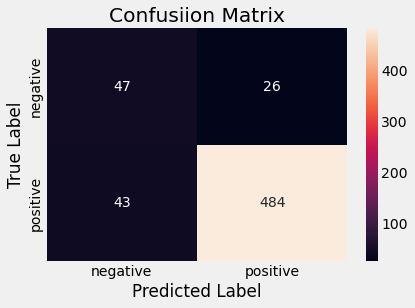

In [235]:
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusiion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [262]:
bow_PRF = print(classification_report(y_test, bow_pred))

              precision    recall  f1-score   support

           0       0.52      0.64      0.58        73
           1       0.95      0.92      0.93       527

    accuracy                           0.89       600
   macro avg       0.74      0.78      0.76       600
weighted avg       0.90      0.89      0.89       600



In [263]:
bow_prec = precision_score(y_test, bow_pred) * 100
print("Precision with Bag of Words: ", bow_prec)

Precision with Bag of Words:  94.90196078431372


In [265]:
bow_rec = recall_score(y_test, bow_pred) * 100
print("Recall with Bag of Words: ", bow_rec)

Recall with Bag of Words:  91.84060721062619


In [266]:
bow_f1 = f1_score(y_test, bow_pred) * 100
print("f1-score with Bag of Words: ", bow_f1)

f1-score with Bag of Words:  93.34619093539055


In [254]:
bow_accuracy = accuracy_score(bow_pred, y_test) * 100
print("Accuracy with Bag of Words: ", bow_accuracy)

Accuracy with Bag of Words:  88.5


In [241]:
X_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)
print(X_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1400,) (600,) (1400,) (600,)


In [242]:
#Tf - IDF
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
X_train = tf_idf_vect.fit_transform(X_train)
X_train

<1400x5708 sparse matrix of type '<class 'numpy.float64'>'
	with 19750 stored elements in Compressed Sparse Row format>

In [243]:
x_test = tf_idf_vect.transform(x_test)
x_test.shape

(600, 5708)

In [244]:
tf_idf_nb = MultinomialNB()

In [245]:
tf_idf_nb.fit(X_train, y_train)

MultinomialNB()

In [246]:
tf_idf_pred = tf_idf_nb.predict(x_test)

In [291]:
y_test.value_counts()

1    527
0     73
Name: Label, dtype: int64

In [247]:
cm = confusion_matrix(y_test, tf_idf_pred)
cm

array([[ 31,  42],
       [  0, 527]], dtype=int64)

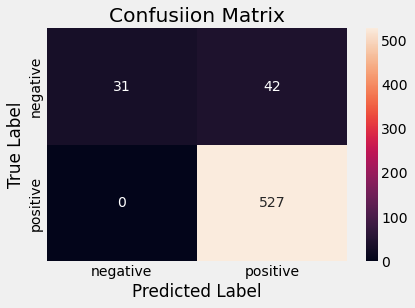

In [248]:
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusiion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [256]:
tf_idf_PRF = print(classification_report(y_test, tf_idf_pred))

              precision    recall  f1-score   support

           0       1.00      0.42      0.60        73
           1       0.93      1.00      0.96       527

    accuracy                           0.93       600
   macro avg       0.96      0.71      0.78       600
weighted avg       0.94      0.93      0.92       600



In [258]:
tf_idf_prec = precision_score(y_test, tf_idf_pred) * 100
print("Precision with TF - IDF: ", tf_idf_prec)

Precision with TF - IDF:  92.61862917398945


In [259]:
tf_idf_rec = recall_score(y_test, tf_idf_pred) * 100
print("Recall with TF - IDF: ", tf_idf_rec)

Recall with TF - IDF:  100.0


In [260]:
tf_idf_f1 = f1_score(y_test, tf_idf_pred) * 100
print("f1-score with TF - IDF: ", tf_idf_f1)

f1-score with TF - IDF:  96.16788321167884


In [253]:
tf_idf_accuracy = accuracy_score(tf_idf_pred, y_test) * 100
print("Accuracy with TF - IDF: ", tf_idf_accuracy)

Accuracy with TF - IDF:  93.0


In [269]:
models = pd.DataFrame({'Model': ['Naive Bayes with BoW', "Naive Bayes with TF-IDF"],  
                       'Accuracy': [bow_accuracy, tf_idf_accuracy], 
                       'Precision': [bow_prec, tf_idf_prec],
                       'Recall': [bow_rec, tf_idf_rec],
                      'f1-score': [bow_f1, tf_idf_f1]}, 
                      columns = ["Model", "Accuracy", "Precision", "Recall", "f1-score"])
models.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy,Precision,Recall,f1-score
1,Naive Bayes with TF-IDF,93.0,92.618629,100.000000,96.167883
0,Naive Bayes with BoW,88.5,94.901961,91.840607,93.346191
